In [ ]:
# !pip install histlite
# !pip install KDEpy
# !pip install scipy.stats

# Density Estimation and Applications in Estimation, Clustering  and Segmentation

Purpose: Study of Parametric and Nonparametric Probability Density Estimation from Empirical Data. A good reference is: Duda, Hart and Stork “Pattern Analysis”, 2nd edition. 

## Part 1: Density Estimations & EM

### P1.1: Fit a nonparametric density estimate to the samples in “data.txt” using Parzen windows approach. You may use the following windows: 

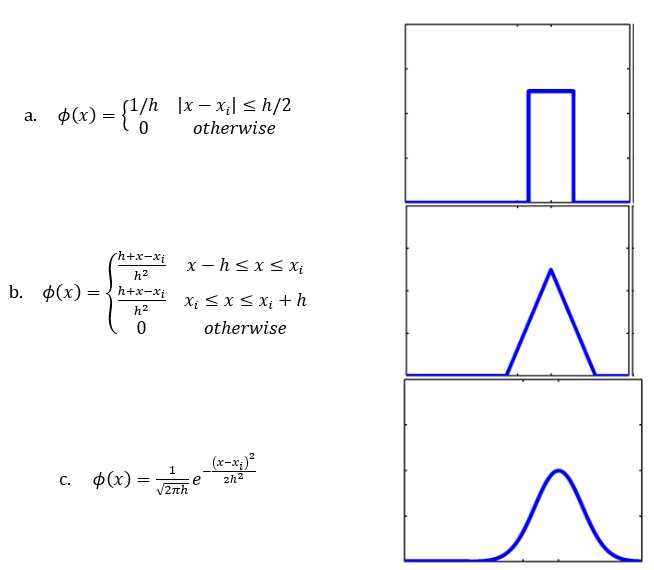

First we can alter the text file by creating a csv file and transposing the data for our data frame. We then insert another row and column to label the data and give numbers for each data entry for the scatter plot. 

In [4]:
# mount google drive to import csv created in excel from data.txt to data.csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv')
data

Row    Values
0      0  0.531578
1      1  2.455880
2      2  0.182226
3      3  1.738233
4      4  1.662072
..   ...       ...
995  995  1.623437
996  996  0.397145
997  997  1.272125
998  998  0.084573
999  999  3.302696

[1000 rows x 2 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Row     1000 non-null   int64  
 1   Values  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [ ]:
data.describe()

Row       Values
count  1000.000000  1000.000000
mean    499.500000     1.019726
std     288.819436     0.996139
min       0.000000     0.010559
25%     249.750000     0.298978
50%     499.500000     0.703355
75%     749.250000     1.465840
max     999.000000     8.469454

We can now scatter plot the data frame easily.

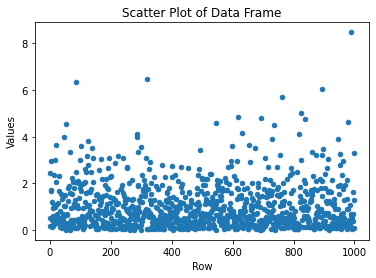

In [ ]:
import matplotlib.pyplot as plt

data.plot(kind='scatter',x='Row',y='Values')
plt.title("Scatter Plot of Data Frame")
plt.show()

Extract the data as variables and plot the histogram:

In [ ]:
# Select data and set it to a variable
import numpy as np
import random
from sklearn.model_selection import train_test_split

# set sata as samples
x_samples = np.array(data['Values'])

# split samples into training and testing
x_train, x_test = train_test_split(x_samples, train_size = 0.5) 
numbers = np.array(data['Row'])

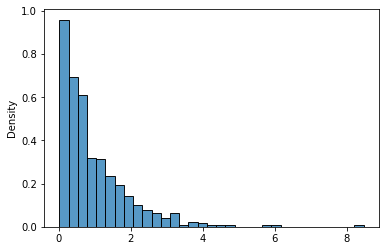

In [ ]:
# Histogram of Data
import seaborn as sns
import numpy as np

x = x_train

%matplotlib inline
# Histogram of Data
sns.histplot(x , stat = "density", kde = False)

The Parzen-window method (also known as Parzen-Rosenblatt window method) is a widely used non-parametric approach to estimate a probability density function p(x) for a specific point p(x) from a sample p(xn) that doesn’t require any knowledge or assumption about the underlying distribution.



For a hypercube of unit length 1 centered at the coordinate system's origin. What this function basically does is assigning a value 1 to a sample point if it lies within 1/2 of the edges of the hypercube, and 0 if lies outside (note that the evaluation is done for all dimensions of the sample point).

$\phi(\pmb u) = \Bigg[\begin{array}{ll} 1 & \quad |u_j| \leq 1/2 \; ;\quad \quad j = 1, ..., d \\
0 & \quad \text{otherwise} \end{array}$ 

If we extend on this concept, we can define a more general equation that applies to hypercubes of any length hn that are centered at x:

$k_n = \sum\limits_{i=1}^{n} \phi \bigg( \frac{\pmb x - \pmb x_i}{h_n} \bigg)$

$\text{where}$

$\pmb u = \bigg( \frac{\pmb x - \pmb x_i}{h_n} \bigg)$



- probability density estimation with hypercube kernel

$p_n(\pmb x) = \frac{1}{n} \sum\limits_{i=1}^{n} \frac{1}{h^d} \phi \bigg[ \frac{\pmb x - \pmb x_i}{h_n} \bigg]\\\\$

$\text{where}\\\\   
h^d = V_n\quad   \text{and}    \quad\phi \bigg[ \frac{\pmb x - \pmb x_i}{h_n} \bigg] = k$

-probability density estimation with Gaussian kernel

$p_n(\pmb x) = \frac{1}{n} \sum\limits_{i=1}^{n} \frac{1}{h^d} \phi \Bigg[ \frac{1}{(\sqrt {2 \pi})^d h_{n}^{d}} \exp \; \bigg[ -\frac{1}{2} \bigg(\frac{\pmb x - \pmb x_i}{h_n} \bigg)^2 \bigg] \Bigg]
$

To understand exactly what th parzen window is we must first identify the function of the parzen window. The window is a kernel somewhat like kernels for convolution. Instead the window kernel is scanned over the data in a similar way a lowpass, highpass or bandpass filter would filter frequencies from a measured signal or in communications when a signal is filtered for Analog Communications.

What this means is that we have two options. we can convolve the kernel over the data using a convolution algorithm or a implimented convolution function OR we can use a Discrete Fourier Transform and multiply the data with the Kernel in the frequency domain sense convolution is multiplication in the frequency domain.

One question a reader might have is why not use the Discrete Fast Fourier Transform (DFFT, Cooley-Tukey Algorithm). The simple reason is because we want to utilize the entirety of the training data set and the fft algorithm requires the length of the set being transformed to be a power of 2.

Now that we understand the concepts of the parzen window let's implement them:


i.	Using different values of h = 0.01, 0.1 and 1, plot the nonparametric density estimates overlaid on the histogram of the data. 


In doing so we should plot the kernel and the individual frequencies when transformed.

a. $\phi(\pmb x) = \Bigg[\begin{array}{ll} \frac{1}{h} & \quad |x - x_i| \leq \frac{h}{2} \; ;\quad \quad i = 1, ..., d \\
0 & \quad \text{otherwise} \end{array}$ 

Uniform Parzen Window:

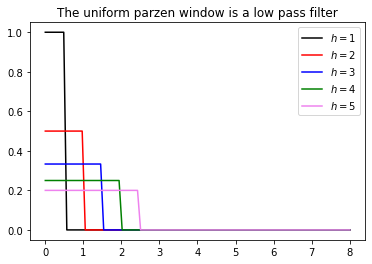

In [ ]:
# uniform window function
def uniform_window_function(x, h):
  return np.where(np.abs(x) <= h/2, 1/h, 0)

# Visualize the window function before DFT or convolution
plot_points = np.linspace(0, 8, 100)
phi_u_1 = uniform_window_function(plot_points, 1) # phi sympol for window
phi_u_2 = uniform_window_function(plot_points, 2) 
phi_u_3 = uniform_window_function(plot_points, 3)
phi_u_4 = uniform_window_function(plot_points, 4) 
phi_u_5 = uniform_window_function(plot_points, 5) 

plt.plot(plot_points, phi_u_1, c='black', ls = '-', label = r'$h = 1$')
plt.plot(plot_points, phi_u_2, c='red', ls = '-', label = r'$h = 2$')
plt.plot(plot_points, phi_u_3, c='blue', ls = '-', label = r'$h = 3$')
plt.plot(plot_points, phi_u_4, c='green', ls = '-', label = r'$h = 4$')
plt.plot(plot_points, phi_u_5, c='violet', ls = '-', label = r'$h = 5$')
plt.title("The uniform parzen window is a low pass filter")
plt.legend()

From the figure we can see the height of the window decreases as the bandwidth h increases.

Text(0.5, 1.0, 'h = 1.0')

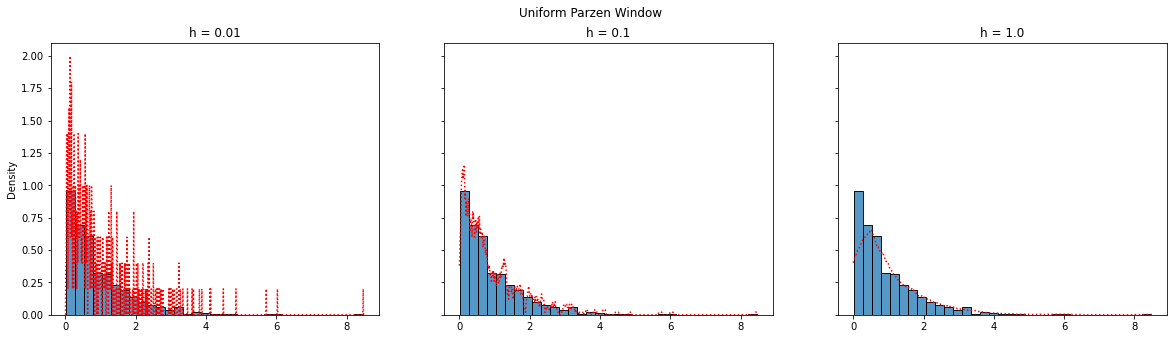

In [ ]:
# Uniform Parzen Window
h = np.array([0.01, 0.1, 1])
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0, 8.5, step_size)


def uniform_parzen_window_esitmate(array, bandwidth):
  n = len(array)
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (np.abs(x - array[xi]) <= bandwidth/2):
        sum = sum + 1/bandwidth 
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Uniform Parzen Window')

# uniform parzen window for h = 0.01
h_selection = 0 # h[0] = 0.01 i.e. h = [0.01, 0.1, 1]
kde_0 = uniform_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[0]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[0])
axes[0].plot(t, kde_0, c='#FF0000', ls = ':')
axes[0].set_title(f"h = {h[h_selection]}")

# uniform parzen window for h = 0.1
h_selection = 1 # h[1] = 0.1 i.e. h = [0.01, 0.1, 1]
kde_1 = uniform_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[1]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[1])
axes[1].plot(t, kde_1, c='#FF0000', ls = ':')
axes[1].set_title(f"h = {h[h_selection]}")

# uniform parzen window for h = 1
h_selection = 2 # h[2] = 1 i.e. h = [0.01, 0.1, 1]
kde_2 = uniform_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[2]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[2])
axes[2].plot(t, kde_2, c='#FF0000', ls = ':')
axes[2].set_title(f"h = {h[h_selection]}")

Text(0.5, 1.0, 'h = 1.0')

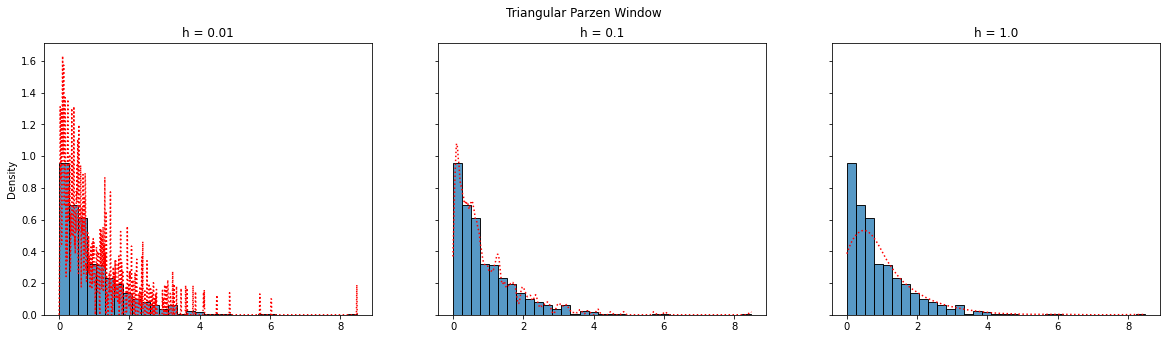

In [ ]:
# Triangular Parzen Window
h = np.array([0.01, 0.1, 1])
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0, 8.5, step_size)
n = len(x_train)

def triangular_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (x - bandwidth <= array[xi] and array[xi] < x):
        sum = sum + (array[xi]-x+bandwidth)/bandwidth**2
      elif (x + bandwidth >= array[xi] and array[xi] >= x):
        sum = sum + (bandwidth+x-array[xi])/bandwidth**2
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Triangular Parzen Window')

# triangular parzen window for h = 0.01
h_selection = 0 # h[0] = 0.01 i.e. h = [0.01, 0.1, 1]
kde_0 = triangular_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[0]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[0])
axes[0].plot(t, kde_0, c='#FF0000', ls = ':')
axes[0].set_title(f"h = {h[h_selection]}")

# triangular parzen window for h = 0.1
h_selection = 1 # h[1] = 0.1 i.e. h = [0.01, 0.1, 1]
kde_1 = triangular_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[1]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[1])
axes[1].plot(t, kde_1, c='#FF0000', ls = ':')
axes[1].set_title(f"h = {h[h_selection]}")

# triangular parzen window for h = 1
h_selection = 2 # h[2] = 1 i.e. h = [0.01, 0.1, 1]
kde_2 = triangular_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[2]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[2])
axes[2].plot(t, kde_2, c='#FF0000', ls = ':')
axes[2].set_title(f"h = {h[h_selection]}")

Text(0.5, 1.0, 'h = 1.0')

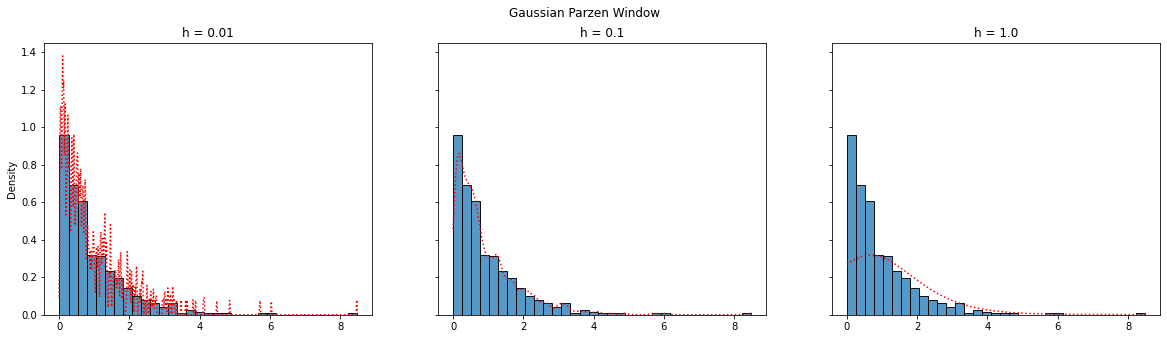

In [ ]:
# Gaussian Parzen Window
h = np.array([0.01, 0.1, 1])
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0, 8.5, step_size)
n = len(x_train)

def gaussian_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      sum = sum + 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Gaussian Parzen Window')

# gaussian parzen window for h = 0.01
h_selection = 0 # h[0] = 0.01 i.e. h = [0.01, 0.1, 1]
kde_0 = gaussian_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[0]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[0])
axes[0].plot(t, kde_0, c='#FF0000', ls = ':')
axes[0].set_title(f"h = {h[h_selection]}")

# gaussian parzen window for h = 0.1
h_selection = 1 # h[1] = 0.1 i.e. h = [0.01, 0.1, 1]
kde_1 = gaussian_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[1]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[1])
axes[1].plot(t, kde_1, c='#FF0000', ls = ':')
axes[1].set_title(f"h = {h[h_selection]}")

# gaussian parzen window for h = 1
h_selection = 2 # h[2] = 1 i.e. h = [0.01, 0.1, 1]
kde_2 = gaussian_parzen_window_esitmate(x_train, h[h_selection])

# plot of h[2]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[2])
axes[2].plot(t, kde_2, c='#FF0000', ls = ':')
axes[2].set_title(f"h = {h[h_selection]}")

The Parzen Window is also known as the Kernel Density Estimation (KDE) and the algorithms for various kernels have been implimented in the module sklearn. Module Example: [Simple 1D Kernel Density Estimation](https://docs.w3cub.com/scikit_learn/auto_examples/neighbors/plot_kde_1d#sphx-glr-auto-examples-neighbors-plot-kde-1d-py)

The available kernels from the sklearn module are as follows:

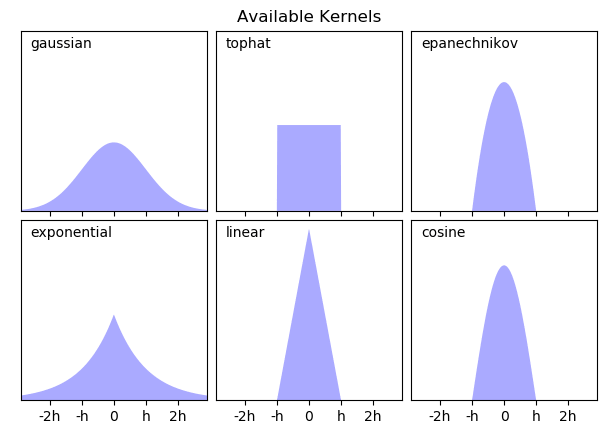

ii.	Using window in (a) find k-NN nonparametric density estimates using different values of k = 1,10 and 30, plot the nonparametric density estimates overlaid on the histogram of the data. 

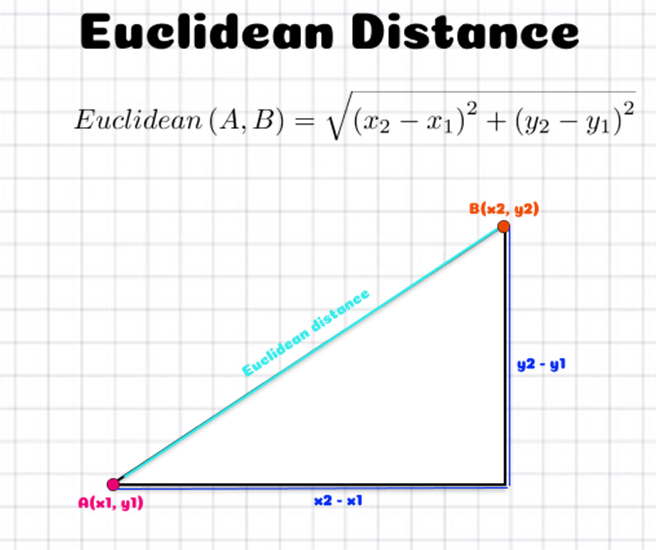

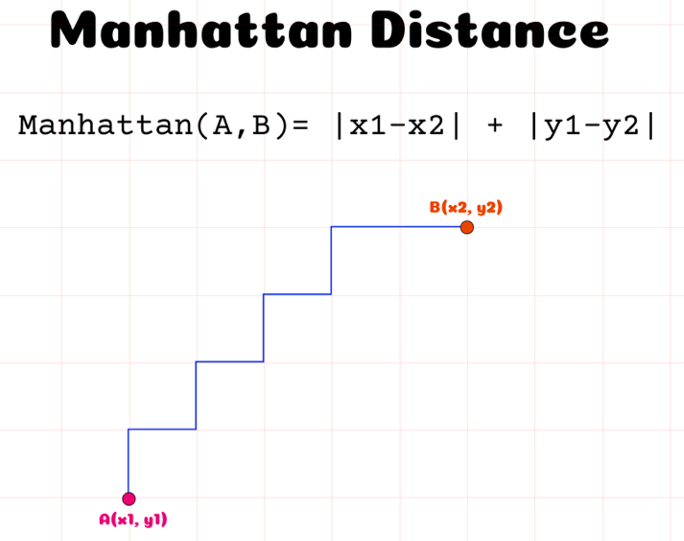

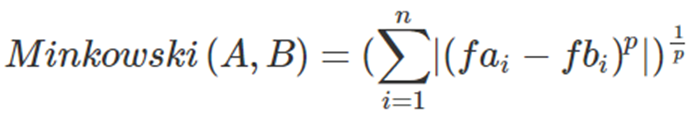

Source of above images:
https://aigents.co/blog/publication/distance-metrics-for-machine-learning

a. Uniform Window K-NN (Kernel Nearest Neighbor):

Text(0.5, 1.0, 'k = 30')

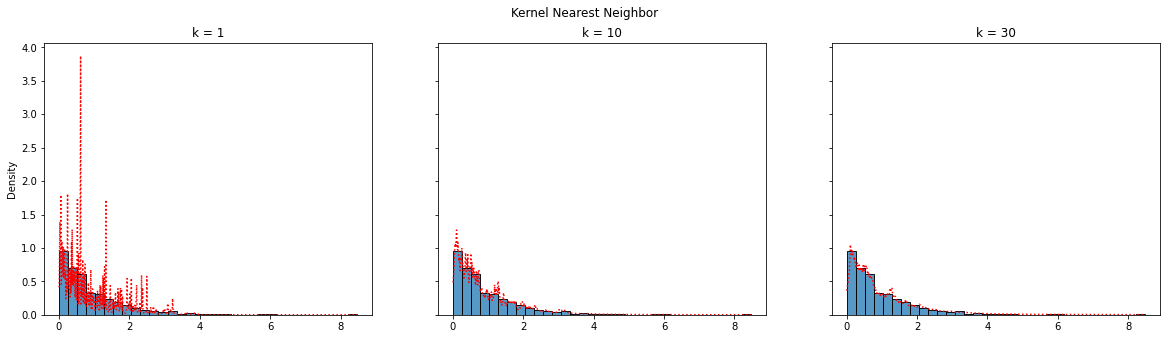

In [ ]:
# K-NN Density Estimation

k = [1, 10, 30] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(step_size, 8.5-step_size, step_size) 
# sum point between 0 and 0.13 is jumping to a pdf value of 35 so it needed to be excluded
n = len(x_train)

def K_NN_estimate(array, number_of_neighbors):
  n = len(array)
  pdf = []

  initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    number_of_neighbors = round(initial_number_of_neighbors/np.sqrt(x)) # k_n = k_1/sqrt(n)
    manhattan_distances = []
    for xi in range(1, n):
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Kernel Nearest Neighbor')

# Kernel Nearest Neighbor for k = 1
k_selection = 0 # k[0] = 1 i.e. k = [1, 10, 30]
kde_0 = K_NN_estimate(x_train, k[k_selection])

# plot of k[0]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[0])
axes[0].plot(t, kde_0, c='#FF0000', ls = ':')
axes[0].set_title(f"k = {k[k_selection]}")

# Kernel Nearest Neighbor for k = 10
k_selection = 1 # k[1] = 10 i.e. k = [1, 10, 30]
kde_1 = K_NN_estimate(x_train, k[k_selection])

# plot of k[1]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[1])
axes[1].plot(t, kde_1, c='#FF0000', ls = ':')
axes[1].set_title(f"k = {k[k_selection]}")

# Kernel Nearest Neighbor for k = 30
k_selection = 2 # k[2] = 30 i.e. k = [1, 10, 30]
kde_2 = K_NN_estimate(x_train, k[k_selection])

# plot of k[2]
sns.histplot(x_train, stat = "density", kde = False, ax = axes[2])
axes[2].plot(t, kde_2, c='#FF0000', ls = ':')
axes[2].set_title(f"k = {k[k_selection]}")

As we can see from the plots above; the K-NN  window approach doesn't produce very good density estimations.

### P1.2: The exponential density has a single parameter θ, where p(θ)=θe^(-θx),θ>0 and x>0. Given n samples x_1,x_2,…,x_n that are drawn independently and identically from the exponential distribution.

i) Derive the maximum likelihood estimate for θ.



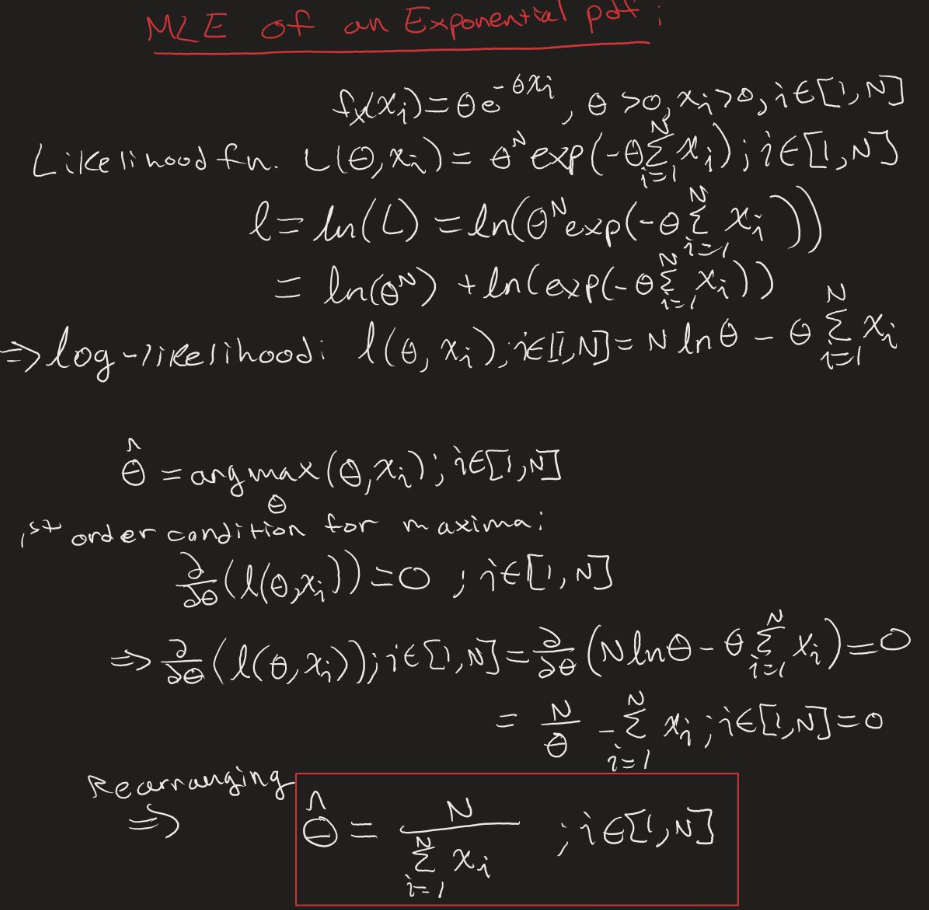

ii)	Compute the maximum likelihood estimate for θ for the samples in “data.txt”. Plot the maximum likelihood exponential density overlaid on the histogram of the data. 

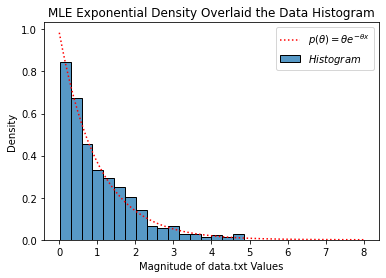

In [ ]:
x = x_train
N = len(x)

""" Maximum Likelihood Parameter Estimation of 
an Exponential Probability Density Function (pdf)""" 
X_sum = 0
for i in range(0, len(x)):
  X_sum += x[i]

θ = N/X_sum 

pdf = θ * np.exp(-θ*X_plot)

# Histogram of Data
import seaborn as sns
import numpy as np

# Histogram of Data
sns.histplot(x, stat = "density", kde = False, label = "$Histogram$")
plt.plot(X_plot[:, 0], pdf, c='#FF0000', ls = ':', label = "$p(θ) = θe^{-θx}$")
plt.title("MLE Exponential Density Overlaid the Data Histogram")
plt.xlabel("Magnitude of data.txt Values")
plt.legend()
plt.show()

### P1.3: Consider the K-component Gaussian mixture model with parameters (K=3):

- $ α_1=0.5, μ_1=43,σ_1=10 $ \\
- $ α_2=0.2, μ_2=128,σ_2=10 $ \\
- $ α_3=0.3, μ_3=170,σ_3=10 $ \\


a.	Write a function that takes as input a value for n and returns a 1×n vector x representing a random sample drawn from this mixture model.

b.	Write a function “EM” that takes x and an integer K and returns the MLE of a Gaussian mixture model with K components, as computed by the EM algorithm.

c.	In the code for the EM algorithm, include commands that show the K different Gaussians components as they are iteratively updated.

d.	Generate a sample from the Gaussian mixture model of size n = 1000. Call EM function with K = 3. Report the following:
- i.	The estimates of the model parameters and how they compare to the true values
- ii.	The effect of initial values and the number of iterations required until convergence
- iii.	Plot the log-likelihood as a function of iteration number and verify that it is nondecreasing.


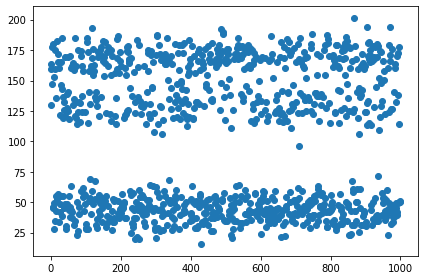

In [ ]:
# imports
from scipy.stats import norm

Mus = np.array([[43], [128], [170]]) # means
CovMs =np.array([[10], [10], [10]]) # covariances
alpha = np.array([0.5, 0.2, 0.3]) # a.k.a. weights

def generate_univariate_GMM_data(n_data, means, covariances, weights):
    """Generate Gaussian Mixture Model data points"""
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        # pick a cluster id and create data from this cluster
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        def generate_normal(desired_mean, desired_standard_deviation, N):
          # Linear Congruential Generator (LCG) utilizing Universal Hash function for reproducability of deterministic functional observable outcomes
          # Algorithm from Monte Carlo Simulations
          def rng(m=2**32, a=1103515245, c=12345):
              rng.current = (a*rng.current + c) % m # z_i = (a*z_i-1 + c) mod(m)
              return rng.current/m

          # setting the seed of the LCG
          rng.current = 1
          
          # generate Uniform(0, 1)
          a = 0; b = 1
          U = np.array([a+(b-a)*rng() for i in range(N)])
          
          # Standard Uniform to Standard Normal Inverse Transform implimentation from John D. Cook's blog
          initial_mean = 0; initial_standard_deviation = 1
          Z = initial_mean + 2**0.5 * initial_standard_deviation * special.erfinv(U * 2 - 1)
          
          # Affine Transform from Standard Normal to Desired Normal
          desired_normal = [] # keeping the _1 to remind myself this data is based on the 1-dimensional stream_1
          for i in range(len(Z)):
            desired_normal.append(desired_standard_deviation * Z[i] + desired_mean)  # *affine* transformation 𝑌= 𝜎𝑋+𝜇
          desired_normal = np.array(desired_normal)
          return desired_normal
        x = generate_normal(means[k], covariances[k], n_data)
        data[i] = x.item(i)
   return data

# generate data
np.random.seed(4)
X = generate_univariate_GMM_data(1000, Mus, CovMs, alpha) # random sample drawn from GMM
X_plot = np.arange(len(X))

plt.scatter(X_plot, X)
plt.tight_layout()

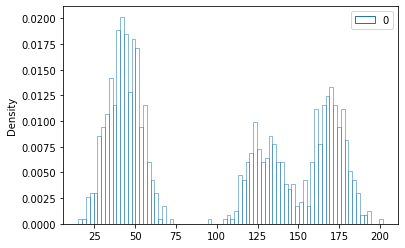

In [ ]:
# plot Gaussian
sns.histplot(X, bins = 80, stat = "density", kde = False, fill = False, color = "black")

Text(0, 0.5, 'Log-Likelihood')

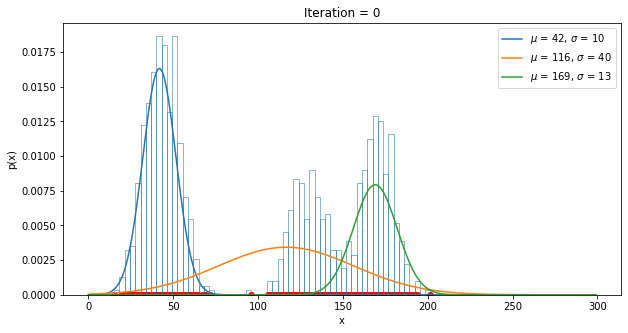

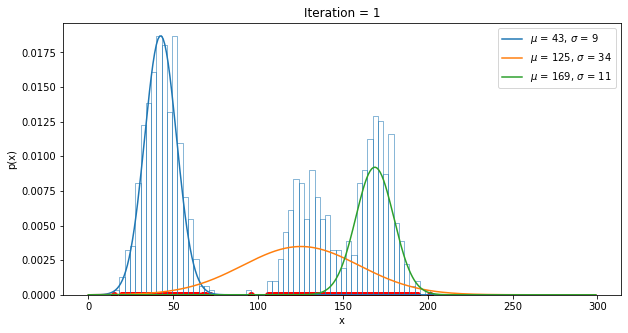

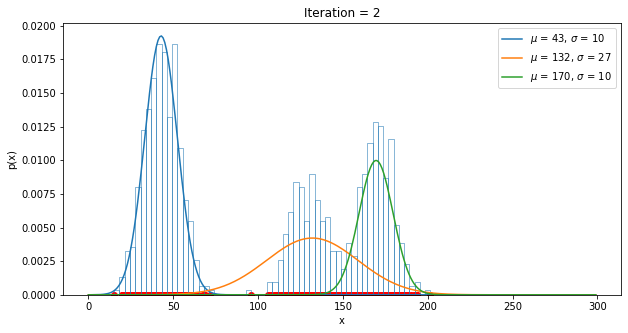

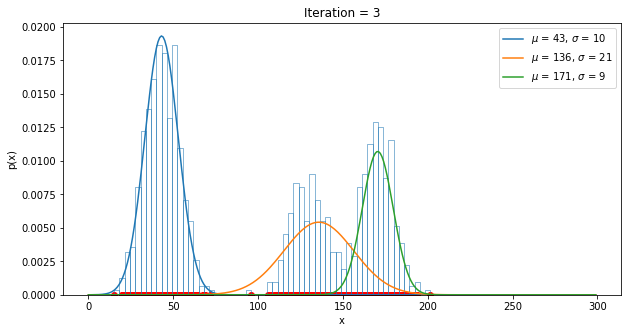

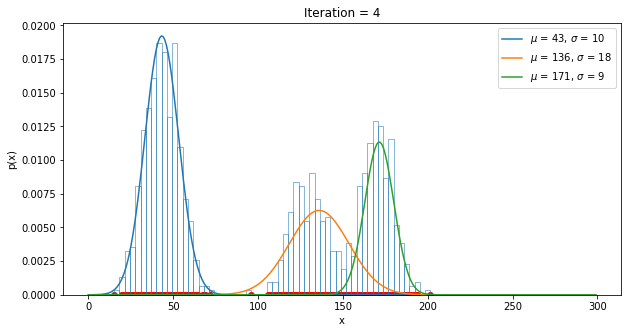

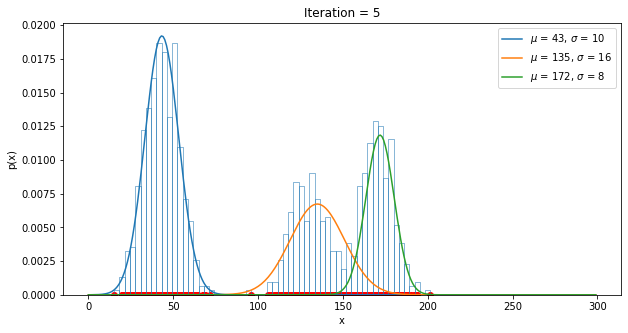

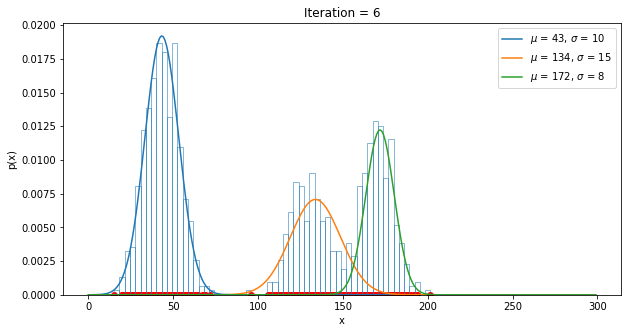

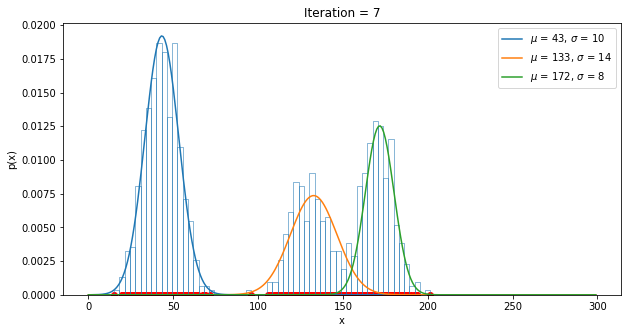

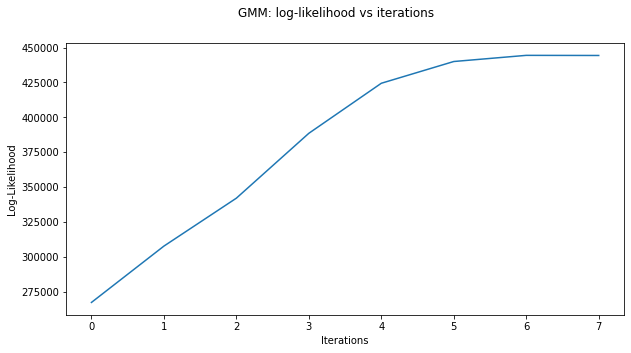

In [ ]:
# EM Algorithm Implementation from
import sys

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood) < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    # if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
    fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
    x = np.arange(0,300,1)
    y = np.zeros([len(x)])
    yax = np.zeros([N])
    axes.scatter(X, yax, color = "red")    
    
    for k in range(0, K):
      for j in range(1, len(x)):
        y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
      axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
    sns.histplot(X, stat = "density", bins = 60, kde = False, fill = False, color = "black")
    axes.set_xlabel("x")
    axes.set_ylabel("p(x)")
    axes.set_title(f"Iteration = {iteration}")
    axes.legend()
    fig.show()
    
    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total

K = 3
convergence_discriminant_toll = 90 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(X, K, convergence_discriminant_toll)


# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

In [ ]:
print(f"iteration = {iteration}")
print(f"mu = {mu}")
print(f"sigma = {sigma}")
print(f"alpha =  {alpha}")

iteration = 18
mu = [[ 42.86779161]
 [128.1173807 ]
 [169.71568964]]
sigma = [ 9.71581605  9.58384111 10.70864685]
alpha =  [0.50400076 0.20266955 0.29332969]


### P1.4: Using the EM algorithm, estimate the marginal densities of the classes in the following images:
- a.  “Lung.pgm” 

- b. “Kidney.pgm”


In [5]:
# mount google drive to import csv created in excel from data.txt to data.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


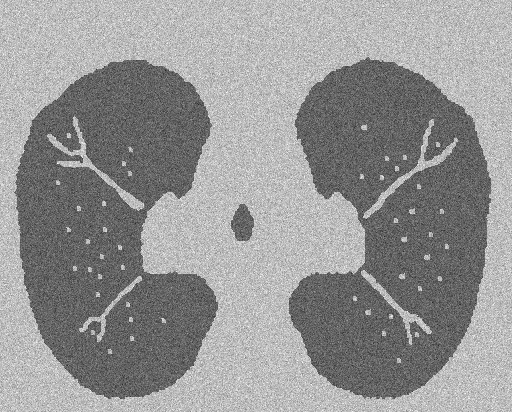

(412, 512)


In [6]:
# import cv2 module for reading and displaying images from colab drive
from google.colab.patches import cv2, cv2_imshow

lung_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Density Estimation and Basics of Segmentation by EM Method/lung.pgm")
# cv2 module automatically detects a red, blue and green image channel so we
# need to convert the image to a single grayscale channel:
lung_image = cv2.cvtColor(lung_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(lung_image)
print(lung_image.shape)

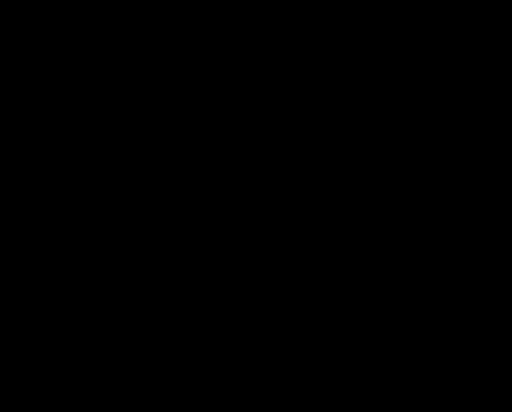

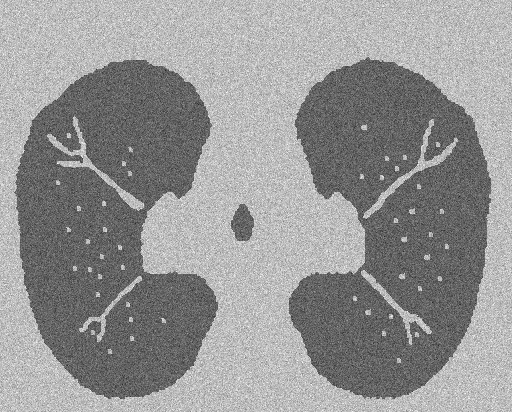

(412, 512)


In [ ]:
# normalize image intensities
import numpy as np

# implementation of im2double from Matlab
def im2double(img):
    info = np.iinfo(img.dtype) # Get the data type of the input image
    return img.astype(np.float) / info.max # Divide all values by the largest possible value in the datatype

normalized_lung_image = im2double(lung_image)
cv2_imshow(normalized_lung_image)
lung_image = normalized_lung_image * 255 # Levels, L = 2^n - 1 = 2^8 - 1 = 256 - 1 = 255
cv2_imshow(lung_image)
print(lung_image.shape)

In [ ]:
Length, Width = lung_image.shape
column_total = Length*Width # 412*512 = 210,944

# want a 1 dimensional vector to plot the histogram
# easiest with a 1 dimensional numpy column vector
lung_image_vector = lung_image.reshape(column_total, 1)
lung_image_vector = np.array(lung_image_vector)
print(lung_image_vector)
print(lung_image_vector.shape)

[[211.]
 [156.]
 [194.]
 ...
 [175.]
 [194.]
 [187.]]
(210944, 1)


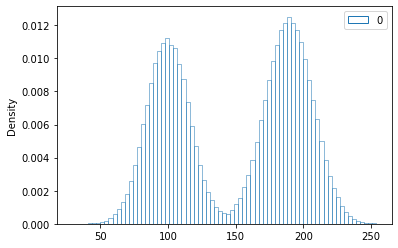

In [ ]:
import seaborn as sns
sns.histplot(lung_image_vector, stat = "density", kde = False, fill = False, color = "black")

From the histogram we can see two guassian  curves that we can use the EM algorithm so K = 2

In [ ]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood) < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    # if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
    fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
    x = np.arange(0, 255,1)
    y = np.zeros([len(x)])
    distribution = np.zeros([K, len(x)])
    yax = np.zeros([N])
    axes.scatter(X, yax, color = "red")    
    
    for k in range(0, K):
      for j in range(1, len(x)):
        y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
      distribution[k] = y
      axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
    sns.histplot(X, stat = "density", kde = False, fill = False, color = "black")
    axes.set_xlabel("x")
    axes.set_ylabel("p(x)")
    axes.set_title(f"Iteration = {iteration}")
    axes.legend()
    fig.show()  

    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total, distribution

Text(0, 0.5, 'Log-Likelihood')

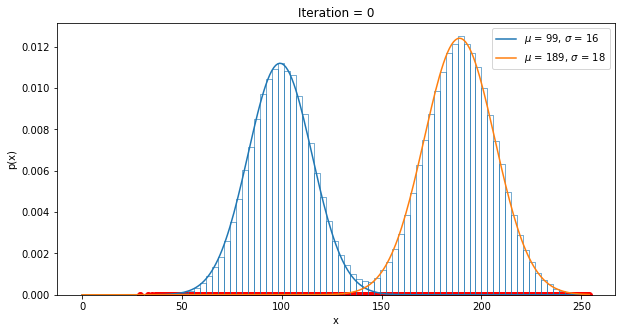

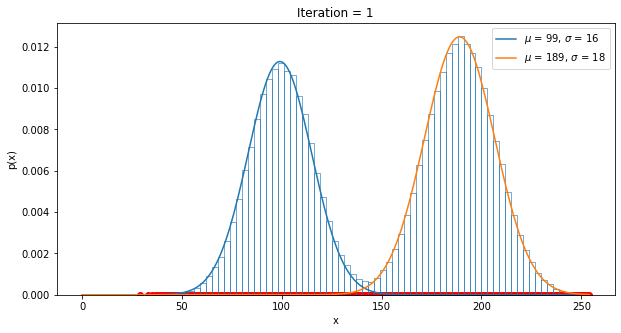

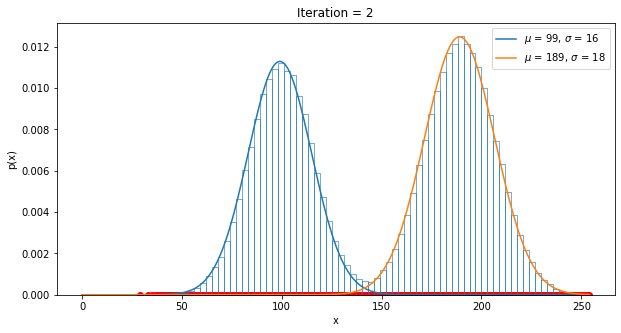

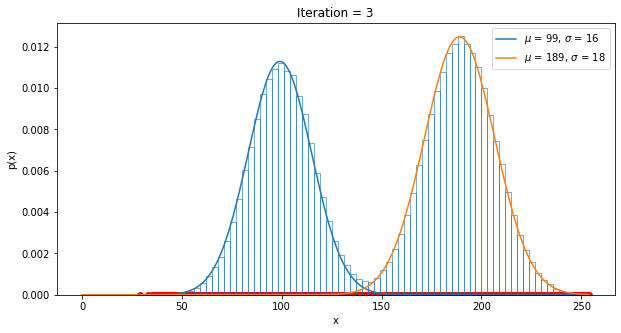

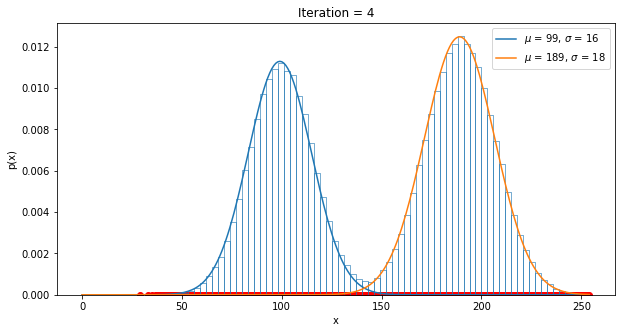

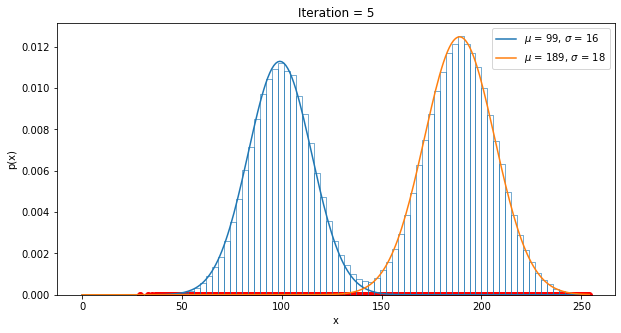

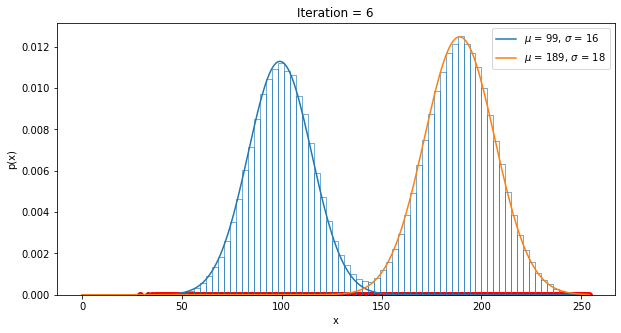

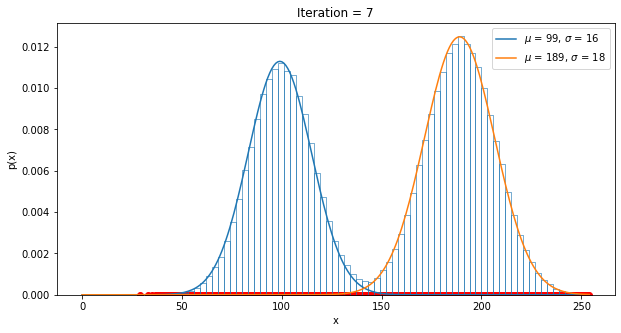

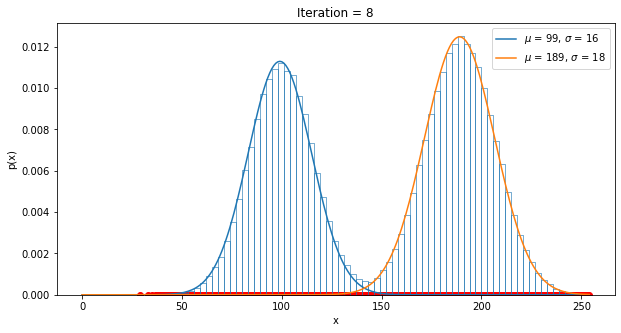

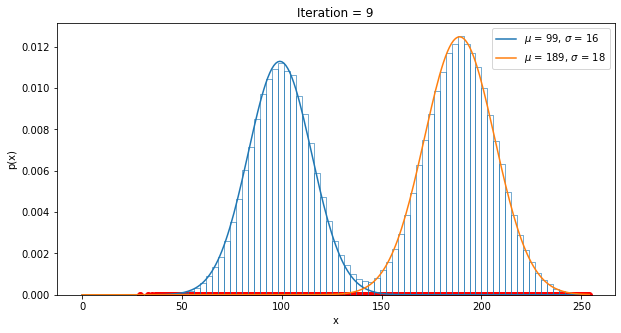

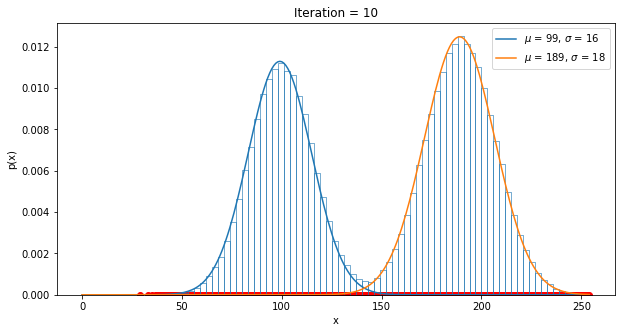

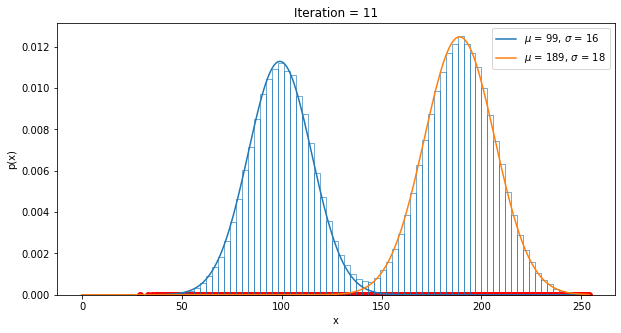

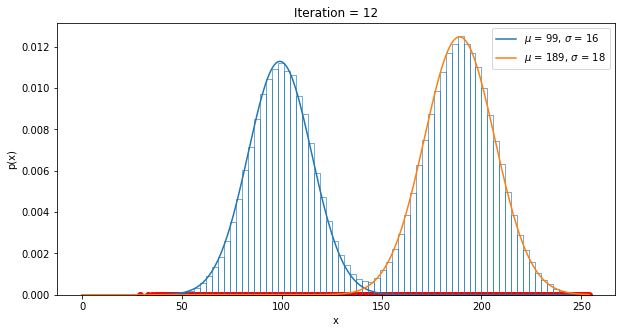

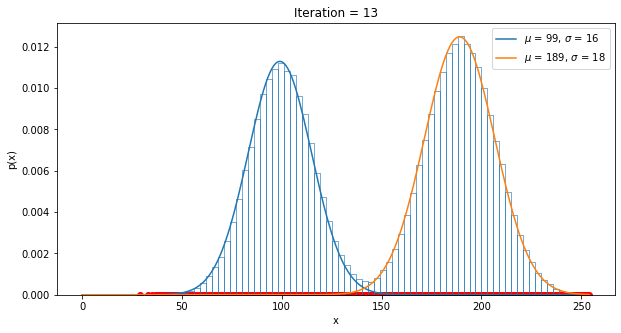

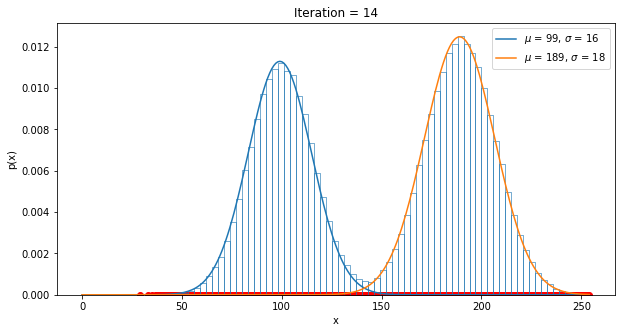

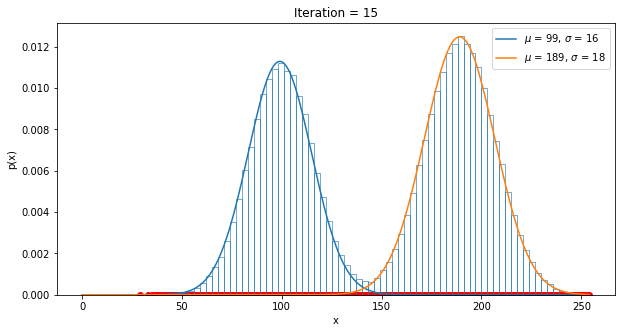

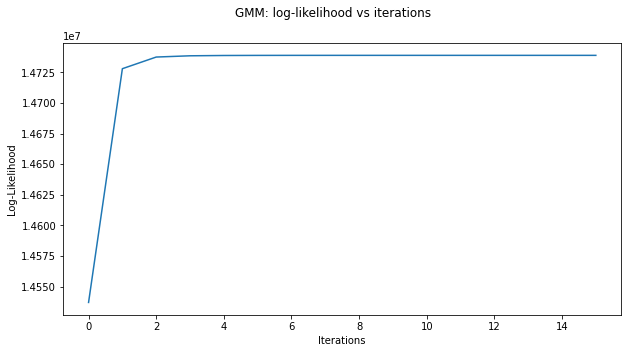

In [ ]:
K = 2
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total, distribution = EM_GMM(lung_image_vector, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

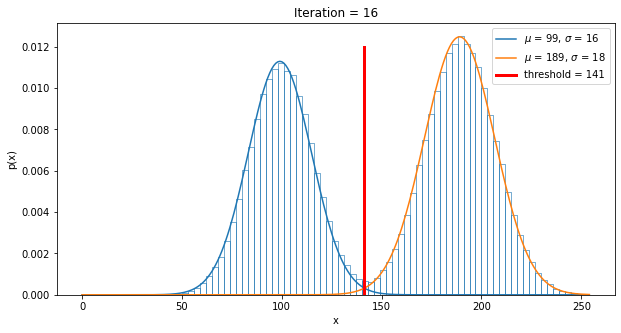

In [ ]:
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
x = np.arange(0, 255,1)
for k in range(0, K):
  for j in range(1, len(x)):
    if distribution[k][j] < distribution[k-1][j]:
      threshold = j
  axes.plot(x, distribution[k], label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
sns.histplot(lung_image_vector, stat = "density", kde = False, fill = False, color = "black")
axes.set_xlabel("x")
axes.set_ylabel("p(x)")
axes.set_title(f"Iteration = {iteration}")
axes.plot([threshold,threshold],[0,0.012], lw = 3 ,color = 'red', label = f"threshold = {threshold}")
axes.legend()
fig.show() 

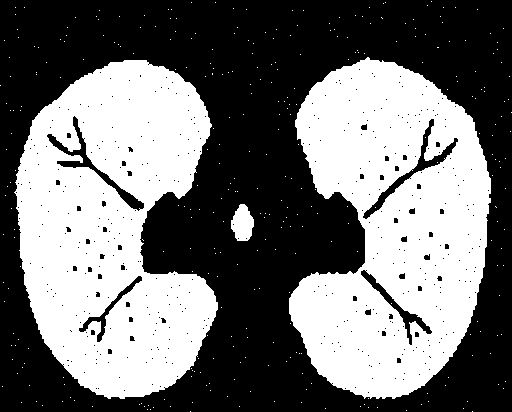

(412, 512)


In [ ]:
segmented_lung_image = np.where(lung_image_vector >= threshold, 0, 255).reshape(Length, Width)
print(segmented_lung_image.shape)

In [7]:
# mount google drive to import csv created in excel from data.txt to data.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


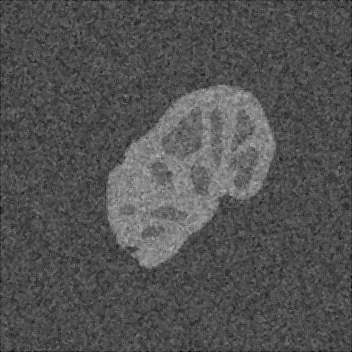

(352, 352)


In [8]:
# import cv2 module for reading and displaying images from colab drive
from google.colab.patches import cv2, cv2_imshow

kidney_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Density Estimation and Basics of Segmentation by EM Method/Kidney.bmp")
# cv2 module automatically detects a red, blue and green image channel so we
# need to convert the image to a single grayscale channel:
kidney_image = cv2.cvtColor(kidney_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(kidney_image)
print(kidney_image.shape)

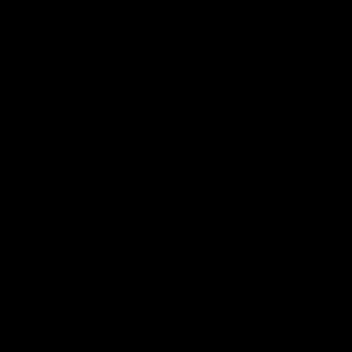

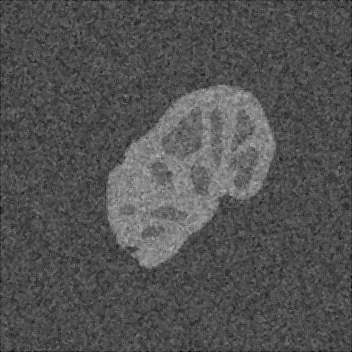

In [ ]:
# normalize image intensities

# implementation of im2double from Matlab
def im2double(img):
    info = np.iinfo(img.dtype) # Get the data type of the input image
    return img.astype(np.float) / info.max # Divide all values by the largest possible value in the datatype

normalized_kidney_image = im2double(kidney_image)
cv2_imshow(normalized_kidney_image)
kidney_image = normalized_kidney_image * 255 # Levels, L = 2^n - 1 = 2^8 - 1 = 256 - 1 = 255
cv2_imshow(kidney_image)

In [ ]:
Length, Width = kidney_image.shape
column_total = Length*Width # 312*312 = 97,344 pixels

# want a 1 dimensional vector to plot the histogram
# easiest with a 1 dimensional numpy column vector
kidney_image_vector = kidney_image.reshape(column_total, 1)
kidney_image_vector = np.array(kidney_image_vector)
print(kidney_image_vector)
print(kidney_image_vector.shape)

[[ 0.]
 [79.]
 [56.]
 ...
 [70.]
 [42.]
 [ 0.]]
(123904, 1)


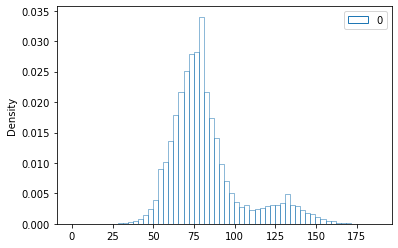

In [ ]:
sns.histplot(kidney_image_vector, bins = 60, stat = "density", kde = False, fill = False, color = "black")

We can see there are two mode local maxima around 75 and 130 se we can choose K = 2 again.

In [ ]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood) < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
      fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
      x = np.arange(0, 255,1)
      y = np.zeros([len(x)])
      distribution = np.zeros([K, len(x)])
      yax = np.zeros([N])
      axes.scatter(X, yax, color = "red")    
      
      for k in range(0, K):
        for j in range(1, len(x)):
          y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
        distribution[k] = y
        axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
      sns.histplot(X, stat = "density", kde = False, fill = False, color = "black")
      axes.set_xlabel("x")
      axes.set_ylabel("p(x)")
      axes.set_title(f"Iteration = {iteration}")
      axes.legend()
      fig.show()  

    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total, distribution

Text(0, 0.5, 'Log-Likelihood')

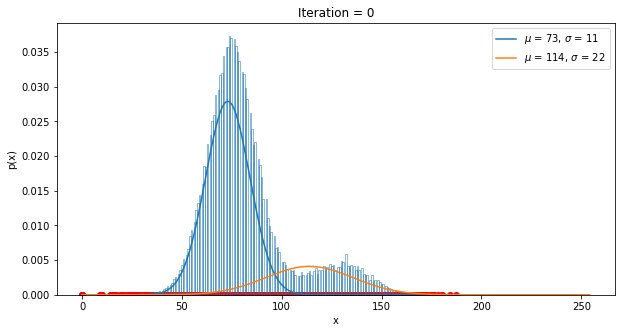

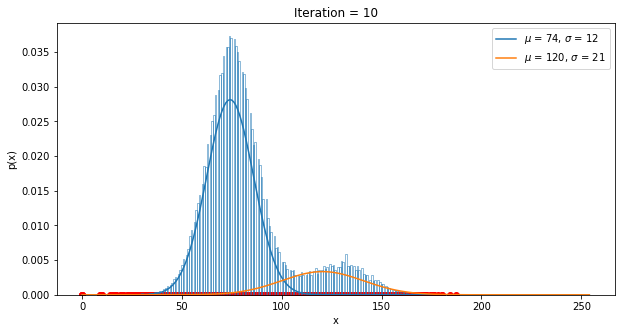

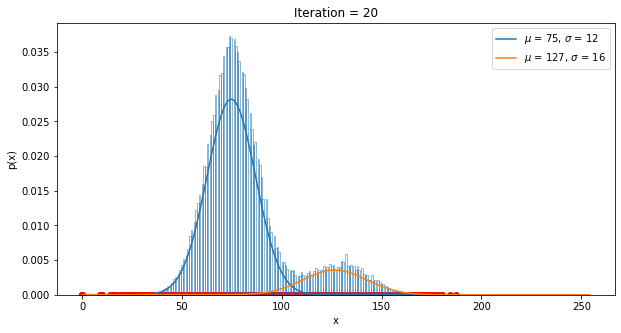

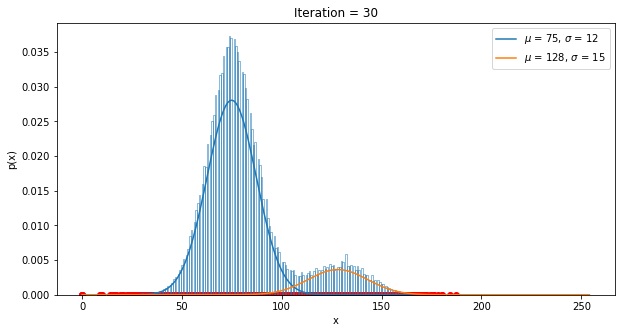

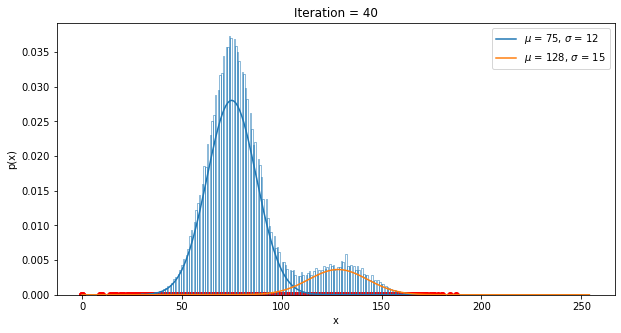

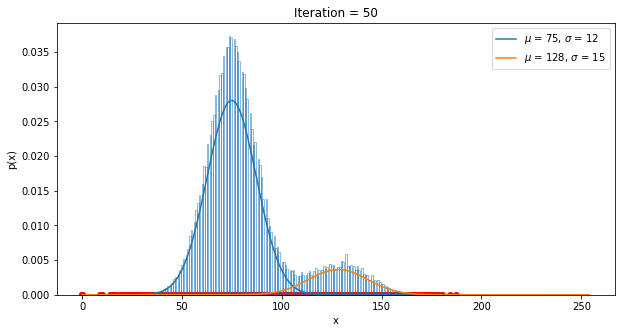

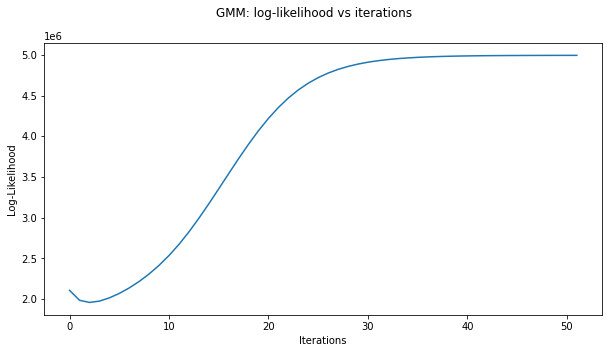

In [ ]:
K = 2
convergence_discriminant_toll = 150 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total, distribution = EM_GMM(kidney_image_vector, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

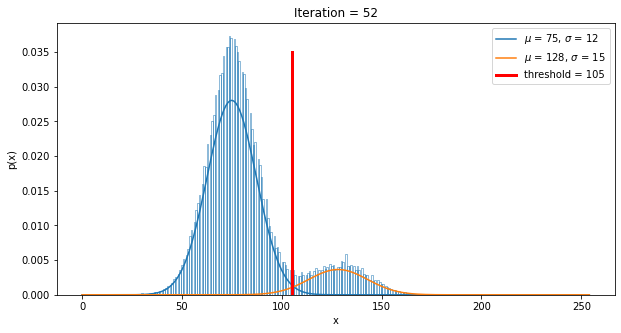

In [ ]:
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
x = np.arange(0, 255,1)
for k in range(0, K):
  for j in range(1, len(x)):
    if distribution[k][j] < distribution[k-1][j]:
      threshold = j
  axes.plot(x, distribution[k], label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
sns.histplot(kidney_image_vector, stat = "density", kde = False, fill = False, color = "black")
axes.set_xlabel("x")
axes.set_ylabel("p(x)")
axes.set_title(f"Iteration = {iteration}")
axes.plot([threshold,threshold],[0,0.035], lw = 3 ,color = 'red', label = f"threshold = {threshold}")
axes.legend()
fig.show() 

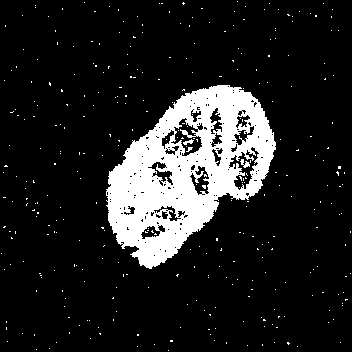

(412, 512)


In [ ]:
segmented_kidney_image = np.where(kidney_image_vector >= threshold, 255, 0).reshape(Length, Width)
cv2_imshow(segmented_kidney_image)
print(segmented_lung_image.shape)

### P1.5: Extra credit: Using the EM algorithm, estimate the marginal densities of the classes in the “rose.ppm” image. Get an initial segmentation based on these estimations.

In [1]:
# mount google drive to import csv created in excel from data.txt to data.csv
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


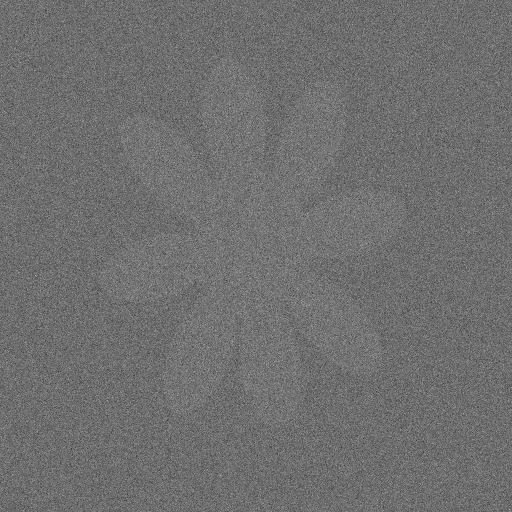

(512, 512)


In [39]:
# import cv2 module for reading and displaying images from colab drive
from google.colab.patches import cv2, cv2_imshow

rose_image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Density Estimation and Basics of Segmentation by EM Method/rose.ppm")
# cv2 module automatically detects a red, blue and green image channel so we
# need to convert the image to a single grayscale channel:
rose_image = cv2.cvtColor(rose_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(rose_image)
print(rose_image.shape)

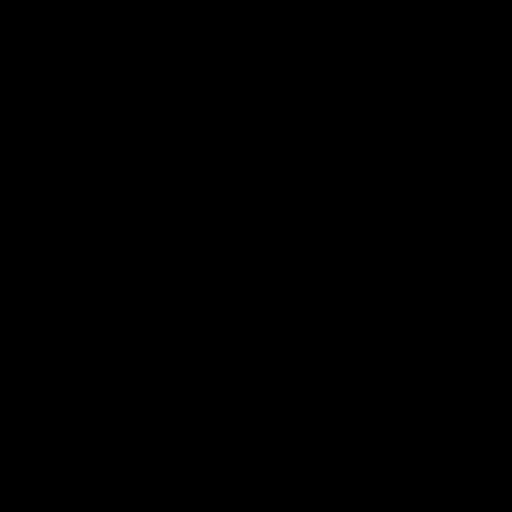

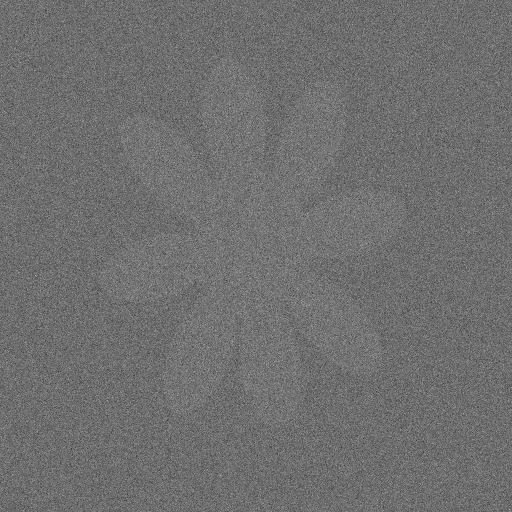

In [40]:
# normalize image intensities
import numpy as np

# implementation of im2double from Matlab
def im2double(img):
    info = np.iinfo(img.dtype) # Get the data type of the input image
    return img.astype(np.float) / info.max # Divide all values by the largest possible value in the datatype

normalized_rose_image = im2double(rose_image)
cv2_imshow(normalized_rose_image)
rose_image = normalized_rose_image * 255 # Levels, L = 2^n - 1 = 2^8 - 1 = 256 - 1 = 255
cv2_imshow(rose_image)

from the image it looks like there are two categories the blue rose and the red background

In [41]:
Length, Width = rose_image.shape
column_total = Length*Width # 512*512 = 786,432 pixels

# want a 1 dimensional vector to plot the histogram
# easiest with a 1 dimensional numpy column vector
rose_image_vector = rose_image.reshape(column_total, 1)
rose_image_vector = np.array(rose_image_vector)
print(rose_image_vector)
print(rose_image_vector.shape)

[[125.]
 [114.]
 [ 99.]
 ...
 [121.]
 [129.]
 [117.]]
(262144, 1)


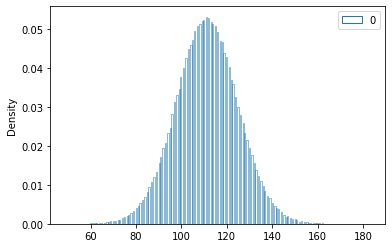

In [42]:
import seaborn as sns
sns.histplot(rose_image_vector, stat = "density", kde = False, fill = False, color = "black")

In [37]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood) < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
      fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
      x = np.arange(0, 255,1)
      y = np.zeros([len(x)])
      distribution = np.zeros([K, len(x)])
      yax = np.zeros([N])
      axes.scatter(X, yax, color = "red")    
      
      for k in range(0, K):
        for j in range(1, len(x)):
          y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
        distribution[k] = y
        axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
      sns.histplot(X, stat = "density", kde = False, fill = False, color = "black")
      axes.set_xlabel("x")
      axes.set_ylabel("p(x)")
      axes.set_title(f"Iteration = {iteration}")
      axes.legend()
      fig.show()  

    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total, distribution

Text(0, 0.5, 'Log-Likelihood')

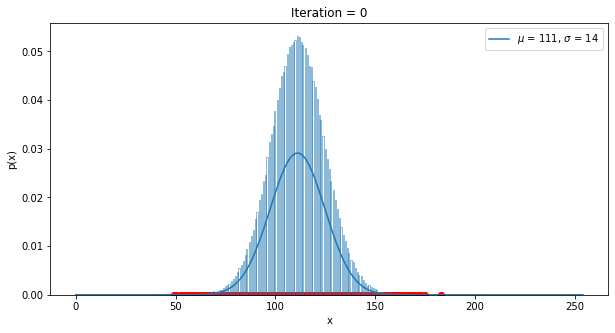

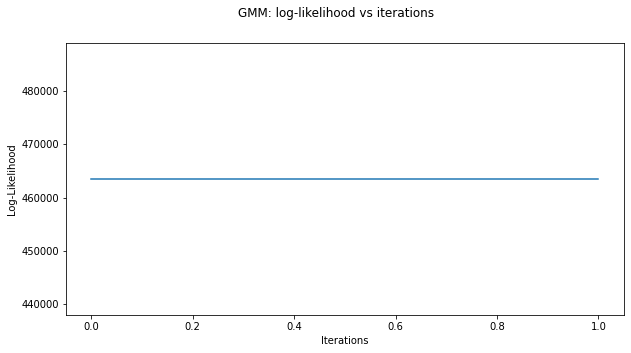

In [43]:
K = 1
convergence_discriminant_toll = 1500 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total, distribution = EM_GMM(rose_image_vector, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

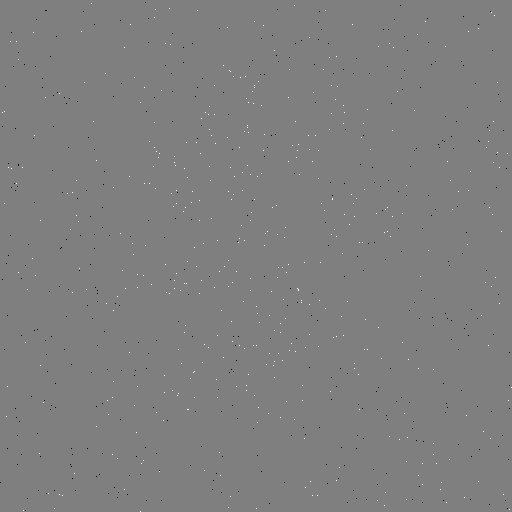

(512, 512)


In [54]:
segmented_rose_image = []
for i in range(0, len(rose_image_vector)):
  if (rose_image_vector.item(i) <= 69): # binary minimum segmentation
    segmented_rose_image.append(0)
  elif (rose_image_vector.item(i) > 69 and rose_image_vector.item(i) < 153):
    segmented_rose_image.append(127)
  else :
    segmented_rose_image.append(255)
segmented_rose_image = np.array(segmented_rose_image).reshape(Length, Width)

cv2_imshow(segmented_rose_image)
print(segmented_rose_image.shape)

## Part 2: Density Estimation & Bayesian Classification

### P2.1: Generate realization from the following density functions:

	
  - a. Unit Normal
  
  - b. 	A uniform density p_1 (x)={1/a,  |x-b|≤a/2 & 0, otherwise)┤	          for various a  and  b.

  - c. 	Triangular density p_2 (x)={((w+x-c)/w^2, c-w≤x≤c or (w-x+c)/w^2,  c≤x≤c+w else 0, otherwise) 	   for various w and  c.

  - d. 	p(x)=ρ p_1 (x)+γ p_2 (x) as shown below, for various ρ and γ.

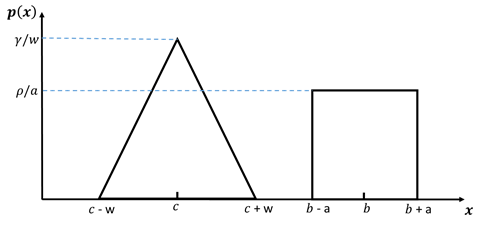

Text(0.5, 1.0, 'Unit Normal, X~N(0,1)')

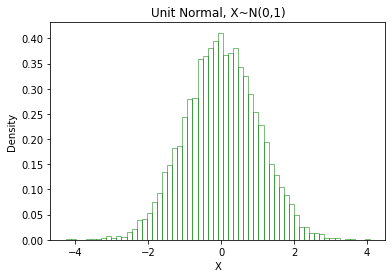

In [3]:
# Unit Normal distribution generated realization

# imports
import numpy as np
import math
from scipy import special
import seaborn as sns
import matplotlib.pyplot as plt

def generate_normal(desired_mean, desired_standard_deviation, N):
  # Linear Congruential Generator (LCG) utilizing Universal Hash function for reproducability of deterministic functional observable outcomes
  # Algorithm from Monte Carlo Simulations
  def rng(m=2**32, a=1103515245, c=12345):
      rng.current = (a*rng.current + c) % m # z_i = (a*z_i-1 + c) mod(m)
      return rng.current/m

  # setting the seed of the LCG
  rng.current = 1
  
  # generate Uniform(0, 1)
  a = 0; b = 1
  U = np.array([a+(b-a)*rng() for i in range(N)])
  
  # Standard Uniform to Standard Normal Inverse Transform implimentation from John D. Cook's blog
  initial_mean = 0; initial_standard_deviation = 1
  Z = initial_mean + 2**0.5 * initial_standard_deviation * special.erfinv(U * 2 - 1)
  
  # Affine Transform from Standard Normal to Desired Normal
  desired_normal = [] # keeping the _1 to remind myself this data is based on the 1-dimensional stream_1
  for i in range(len(Z)):
    desired_normal.append(desired_standard_deviation * Z[i] + desired_mean)  # *affine* transformation 𝑌= 𝜎𝑋+𝜇
  desired_normal = np.array(desired_normal)
  return desired_normal

# call normal distribution function
desired_mean = 0
desired_standard_deviation = 1 # square root of variance given = 4
number_of_points = 10000
Z = generate_normal(desired_mean, desired_standard_deviation, number_of_points)

# plot Gaussian
sns.histplot(Z, stat = "density", bins = 60, kde = False, fill = False, color = "green")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Unit Normal, X~N({desired_mean},{desired_standard_deviation})")

Text(0.5, 1.0, 'Uniform Distribution, X~U(5,9)')

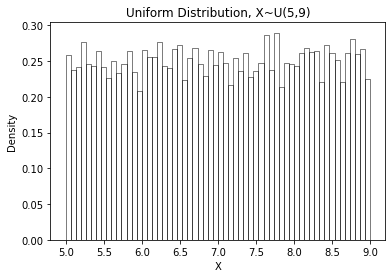

In [4]:
# Uniform Distribution Generated Realization

# imports
import numpy as np
import math
from scipy import special
import seaborn as sns
import matplotlib.pyplot as plt

# generate Uniform(0, 1)
def generate_uniform(a, b, N):
  # Linear Congruential Generator (LCG) utilizing Universal Hash function for reproducability of deterministic functional observable outcomes
  # Algorithm from Monte Carlo Simulations
  def rng(m=2**32, a=1103515245, c=12345):
      rng.current = (a*rng.current + c) % m # z_i = (a*z_i-1 + c) mod(m)
      return rng.current/m

  # setting the seed of the LCG
  rng.current = 1
  
  p_1 = np.array([a+(b-a)*rng() for i in range(N)])
  return p_1

# call generation function
a = 5; b = 9; N = 10000 # start, stop, number of samples
p_1 = generate_uniform(a, b, N)

# plot uniform
sns.histplot(p_1, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Uniform Distribution, X~U({a},{b})")

Text(0.5, 1.0, 'Triangular Distribution, X~T(2,2)')

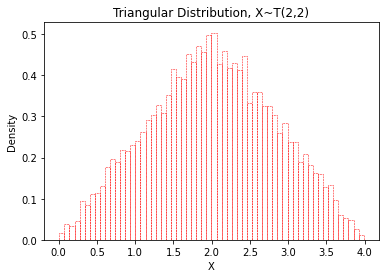

In [5]:
# Triangular Distribution Generated Realization

# imports
import numpy as np
import math
from scipy import special
import seaborn as sns

# Triangular Inverse Transform
def generate_triangular(bandwidth, center, N): # bandwidth = w, center = mode = c, N = number_of_points
  # Linear Congruential Generator (LCG) utilizing Universal Hash function for reproducability of deterministic functional observable outcomes
  # Algorithm from Monte Carlo Simulations
  def rng(m=2**32, a=1103515245, c=12345):
      rng.current = (a*rng.current + c) % m # z_i = (a*z_i-1 + c) mod(m)
      return rng.current/m

  # setting the seed of the LCG
  rng.current = 1
  
  # generate Uniform(0, 1)
  a = 0; b = 1
  U = np.array([a+(b-a)*rng() for i in range(N)])
  p_2 = np.zeros(np.size(U))
  for i in range(0, N):
    if (U[i] < 1/2):
      p_2[i] = (center - bandwidth) + np.sqrt(U[i] * 2 * bandwidth**2)
    else:
      p_2[i] = (center + bandwidth) - np.sqrt((1 - U[i]) * 2 * bandwidth**2)
  return p_2

# call generation function
w = 2; c = 2; n = 10000
p_2 = generate_triangular(w, c, n)

# plot triangular
sns.histplot(p_2, stat = "density", bins = 60, kde = False, fill = False, color = "red", linestyle = "--")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Triangular Distribution, X~T({w},{c})")

Text(0.5, 1.0, 'Mixed Distribution, X ~ ρU(5,9) + γT(2,2)')

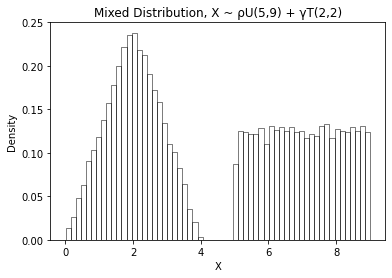

In [6]:
# mixed distributions generated realizations

def generate_mixed(rho, gamma, p_1, p_2):
  p = []
  N = len(p_1) + len(p_2)
  for i in range(0, int(N/2)):
    p.append(gamma*p_2[i])
    p.append(rho*p_1[i])    
  return np.array(p) 

# call generation function
rho = 1; gamma = 1
p = generate_mixed(rho, gamma, p_1, p_2)


# plot mixed distribution
sns.histplot(p, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Mixed Distribution, X ~ ρU({a},{b}) + γT({w},{c})")

### P2.2: Use the realizations in Problem 1 to estimate the density function using the Parzen window approach. Plot the nonparametric density estimates overlaid on the histogram of the data.

### P2.3: Use the realizations in Problem 1 to estimate the density function using the k-NN approach. Plot the nonparametric density estimates overlaid on the histogram of the data.

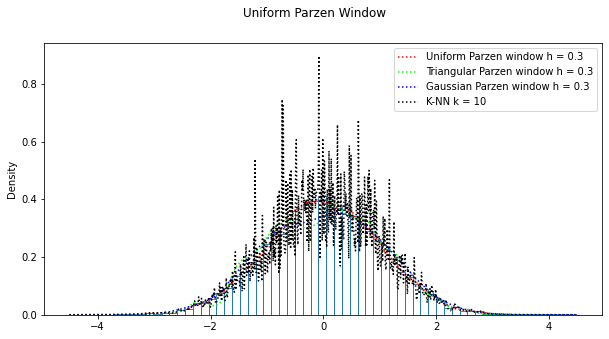

In [ ]:
# Uniform Parzen Window
h = np.array([0.3])
k = [10] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(-4.5, 4.5, step_size)
data_for_estimation = Z


def uniform_parzen_window_esitmate(array, bandwidth):
  n = len(array)
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (np.abs(x - array[xi]) <= bandwidth/2):
        sum = sum + 1/bandwidth 
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def triangular_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (x - bandwidth <= array[xi] and array[xi] < x):
        sum = sum + (array[xi]-x+bandwidth)/bandwidth**2
      elif (x + bandwidth >= array[xi] and array[xi] >= x):
        sum = sum + (bandwidth+x-array[xi])/bandwidth**2
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def gaussian_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      sum = sum + 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def K_NN_estimate(array, number_of_neighbors, n):
  pdf = []

  # initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    manhattan_distances = []
    for xi in range(0, n):
      # if (xi >= 1):
        # number_of_neighbors = round(initial_number_of_neighbors/np.sqrt(x)) # k_n = k_1/sqrt(n)
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('Uniform Parzen Window')

# -------------------------------------------------------------------
# uniform parzen window estimate
h_selection = 0
kde_0 = uniform_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of uniform parzen window
sns.histplot(data_for_estimation, stat = "density", bins = 60, kde = False, fill = False)
plt.plot(t, kde_0, c='#FF0000', ls = ':', label = f"Uniform Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# triangular parzen window estimate
h_selection = 0
kde_1 = triangular_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of triangular parzen window
plt.plot(t, kde_1, c='#00FF00', ls = ':', label = f"Triangular Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate
h_selection = 0
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of gaussian
plt.plot(t, kde_2, c='#0000FF', ls = ':', label = f"Gaussian Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------

# Kernel Nearest Neighbor for k = 10
k_selection = 0
n = len(data_for_estimation)
kde_3 = K_NN_estimate(data_for_estimation, k[k_selection], n)

# plot of Kernel Nearest Neighbor for k = 10
plt.plot(t, kde_3, c='#000000', ls = ':', label = f"K-NN k = {k[k_selection]}")

plt.legend()
plt.show()

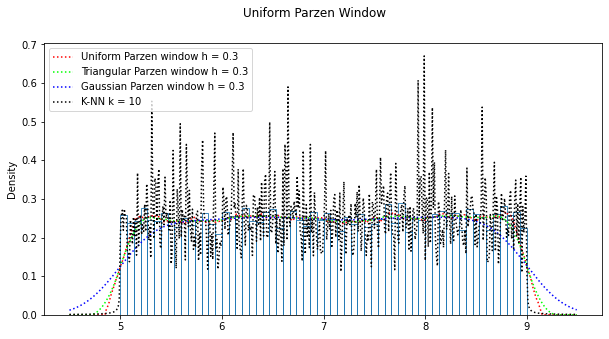

In [ ]:
# Uniform Parzen Window
h = np.array([0.3])
k = [10] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(4.5, 9.5, step_size)
data_for_estimation = p_1


def uniform_parzen_window_esitmate(array, bandwidth):
  n = len(array)
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (np.abs(x - array[xi]) <= bandwidth/2):
        sum = sum + 1/bandwidth 
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def triangular_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (x - bandwidth <= array[xi] and array[xi] < x):
        sum = sum + (array[xi]-x+bandwidth)/bandwidth**2
      elif (x + bandwidth >= array[xi] and array[xi] >= x):
        sum = sum + (bandwidth+x-array[xi])/bandwidth**2
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def gaussian_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      sum = sum + 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def K_NN_estimate(array, number_of_neighbors, n):
  pdf = []

  # initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    manhattan_distances = []
    for xi in range(0, n):
      # if (xi >= 1):
        # number_of_neighbors = round(initial_number_of_neighbors/np.sqrt(x)) # k_n = k_1/sqrt(n)
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('Uniform Parzen Window')

# -------------------------------------------------------------------
# uniform parzen window estimate
h_selection = 0
kde_0 = uniform_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of uniform parzen window
sns.histplot(data_for_estimation, stat = "density", bins = 60, kde = False, fill = False)
plt.plot(t, kde_0, c='#FF0000', ls = ':', label = f"Uniform Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# triangular parzen window estimate
h_selection = 0
kde_1 = triangular_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of triangular parzen window
plt.plot(t, kde_1, c='#00FF00', ls = ':', label = f"Triangular Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate
h_selection = 0
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of gaussian
plt.plot(t, kde_2, c='#0000FF', ls = ':', label = f"Gaussian Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------

# Kernel Nearest Neighbor for k = 10
k_selection = 0
n = len(data_for_estimation)
kde_3 = K_NN_estimate(data_for_estimation, k[k_selection], n)

# plot of Kernel Nearest Neighbor for k = 10
plt.plot(t, kde_3, c='#000000', ls = ':', label = f"K-NN k = {k[k_selection]}")

plt.legend()
plt.show()

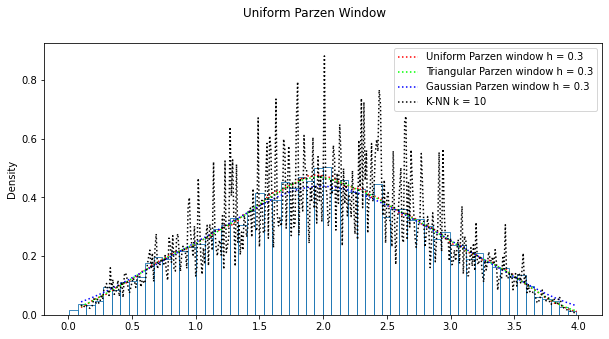

In [ ]:
# Uniform Parzen Window
h = np.array([0.3])
k = [10] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0.1, 4, step_size)
data_for_estimation = p_2


def uniform_parzen_window_esitmate(array, bandwidth):
  n = len(array)
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (np.abs(x - array[xi]) <= bandwidth/2):
        sum = sum + 1/bandwidth 
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def triangular_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (x - bandwidth <= array[xi] and array[xi] < x):
        sum = sum + (array[xi]-x+bandwidth)/bandwidth**2
      elif (x + bandwidth >= array[xi] and array[xi] >= x):
        sum = sum + (bandwidth+x-array[xi])/bandwidth**2
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def gaussian_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      sum = sum + 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def K_NN_estimate(array, number_of_neighbors, n):
  pdf = []

  # initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    manhattan_distances = []
    for xi in range(0, n):
      # if (xi >= 1):
        # number_of_neighbors = round(initial_number_of_neighbors/np.sqrt(x)) # k_n = k_1/sqrt(n)
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('Uniform Parzen Window')

# -------------------------------------------------------------------
# uniform parzen window estimate
h_selection = 0
kde_0 = uniform_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of uniform parzen window
sns.histplot(data_for_estimation, stat = "density", bins = 60, kde = False, fill = False)
plt.plot(t, kde_0, c='#FF0000', ls = ':', label = f"Uniform Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# triangular parzen window estimate
h_selection = 0
kde_1 = triangular_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of triangular parzen window
plt.plot(t, kde_1, c='#00FF00', ls = ':', label = f"Triangular Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate
h_selection = 0
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of gaussian
plt.plot(t, kde_2, c='#0000FF', ls = ':', label = f"Gaussian Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------

# Kernel Nearest Neighbor for k = 10
k_selection = 0
n = len(data_for_estimation)
kde_3 = K_NN_estimate(data_for_estimation, k[k_selection], n)

# plot of Kernel Nearest Neighbor for k = 10
plt.plot(t, kde_3, c='#000000', ls = ':', label = f"K-NN k = {k[k_selection]}")

plt.legend()
plt.show()

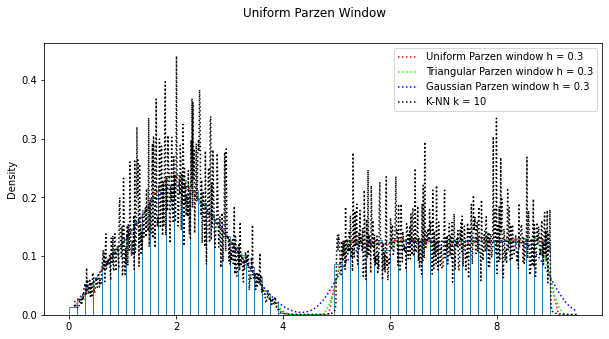

In [ ]:
# Uniform Parzen Window
h = np.array([0.3])
k = [10] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0.1, 9.5, step_size)
data_for_estimation = p


def uniform_parzen_window_esitmate(array, bandwidth):
  n = len(array)
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (np.abs(x - array[xi]) <= bandwidth/2):
        sum = sum + 1/bandwidth 
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def triangular_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      if (x - bandwidth <= array[xi] and array[xi] < x):
        sum = sum + (array[xi]-x+bandwidth)/bandwidth**2
      elif (x + bandwidth >= array[xi] and array[xi] >= x):
        sum = sum + (bandwidth+x-array[xi])/bandwidth**2
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def gaussian_parzen_window_esitmate(array, bandwidth):
  pdf = []
  initial_bandwidth = bandwidth
  for x in t:
    sum = 0
    # bandwidth = initial_bandwidth/np.sqrt(x) # h_n = h_1/sqrt(n) 
    for xi in range(0, n):
      sum = sum + 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)

def K_NN_estimate(array, number_of_neighbors, n):
  pdf = []

  # initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    manhattan_distances = []
    for xi in range(0, n):
      # if (xi >= 1):
        # number_of_neighbors = round(initial_number_of_neighbors/np.sqrt(x)) # k_n = k_1/sqrt(n)
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)

# Histogram of Data
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('Uniform Parzen Window')

# -------------------------------------------------------------------
# uniform parzen window estimate
h_selection = 0
kde_0 = uniform_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of uniform parzen window
sns.histplot(data_for_estimation, stat = "density", bins = 60, kde = False, fill = False)
plt.plot(t, kde_0, c='#FF0000', ls = ':', label = f"Uniform Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# triangular parzen window estimate
h_selection = 0
kde_1 = triangular_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of triangular parzen window
plt.plot(t, kde_1, c='#00FF00', ls = ':', label = f"Triangular Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate
h_selection = 0
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection])

# plot of gaussian
plt.plot(t, kde_2, c='#0000FF', ls = ':', label = f"Gaussian Parzen window h = {h[h_selection]}")

# -------------------------------------------------------------------

# Kernel Nearest Neighbor for k = 10
k_selection = 0
n = len(data_for_estimation)
kde_3 = K_NN_estimate(data_for_estimation, k[k_selection], n)

# plot of Kernel Nearest Neighbor for k = 10
plt.plot(t, kde_3, c='#000000', ls = ':', label = f"K-NN k = {k[k_selection]}")

plt.legend()
plt.show()

### P2.4: Use the realizations above to duplicate Figure 4.7 and 4.12 in Duda et al., 2001. Plot the nonparametric density estimates overlaid on the histogram of the data.

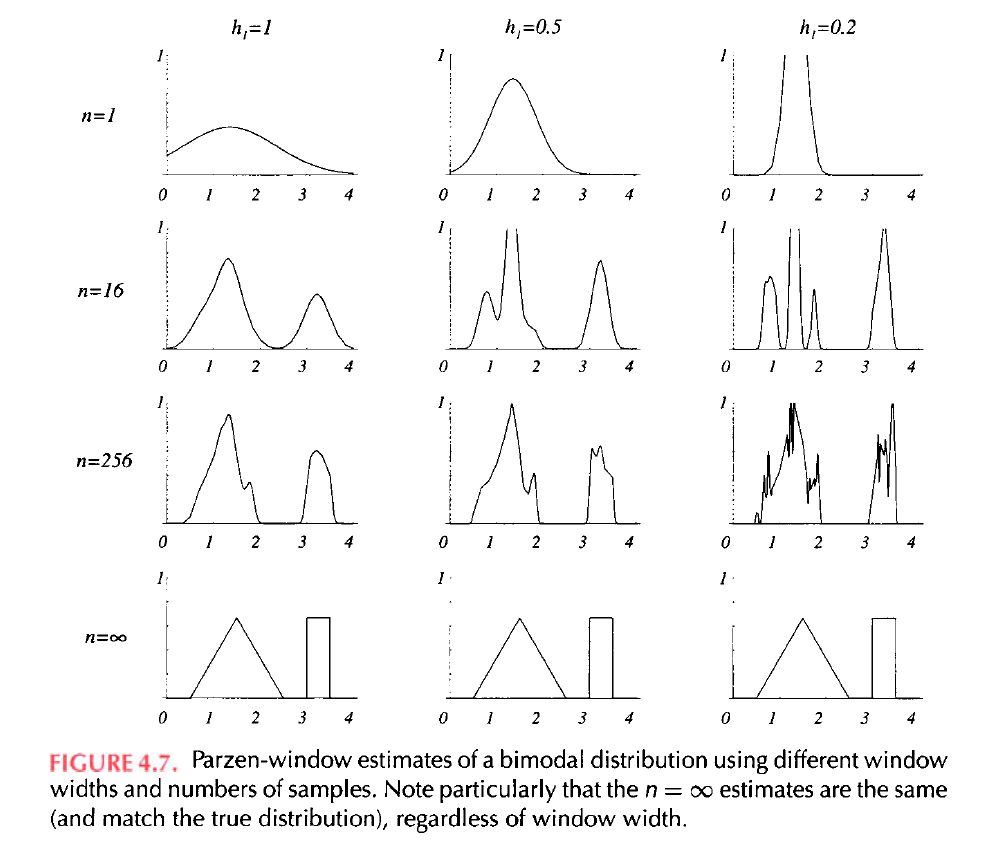

In [2]:
# call generation function unifrom
a = 3; b = 3.5; N = 2500 # start, stop, number of samples
p_1 = generate_uniform(a, b, N)

# plot uniform
sns.histplot(p_1, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Uniform Distribution, X~U({a},{b})")

NameError: ignored

Text(0.5, 1.0, 'Triangular Distribution, X~T(0.75,1.25)')

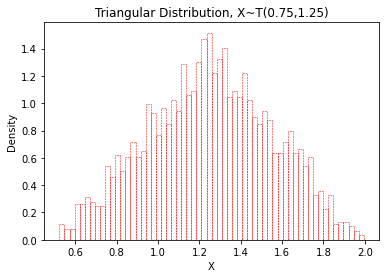

In [ ]:
# call generation function triangular
w = 0.75; c = 1.25; n = 2500
p_2 = generate_triangular(w, c, n)

# plot triangular
sns.histplot(p_2, stat = "density", bins = 60, kde = False, fill = False, color = "red", linestyle = "--")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Triangular Distribution, X~T({w},{c})")

Text(0.5, 1.0, 'Mixed Distribution, X ~ ρU(3,3.5) + γT(0.75,1.25)')

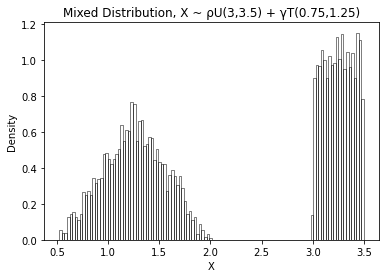

In [ ]:
# call generation function mixed
rho = 1; gamma = 1
p = generate_mixed(rho, gamma, p_1, p_2)

# plot mixed distribution
sns.histplot(p, stat = "density", bins = 120, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Mixed Distribution, X ~ ρU({a},{b}) + γT({w},{c})")

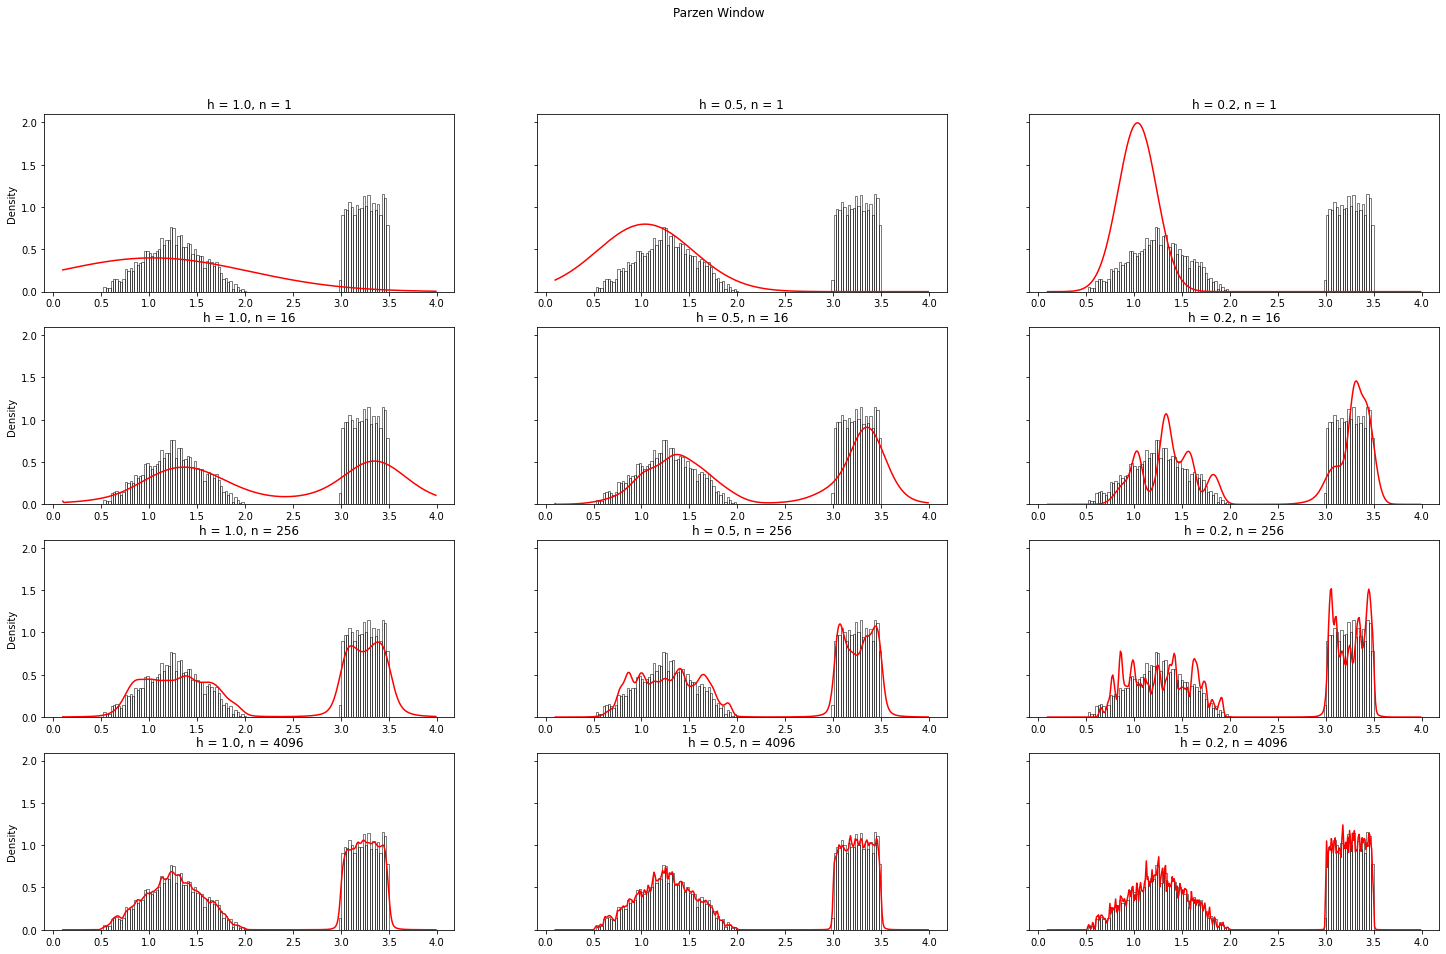

In [ ]:
# Gaussian Parzen Window in Fig. 4.7
h = np.array([1, 0.5, 0.2])
n = np.array([2**0, 2**4, 2**8, 2**12])
k = [10] # number of neighbors
number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0.1, 4, step_size)
n_bins = 120

data_for_estimation = p

def gaussian_parzen_window_esitmate(array, bandwidth, n):
  pdf = []
  initial_bandwidth = bandwidth
  
  for x in t:
    sum = 0
    for xi in range(0, n):
      if (xi >= 1):
        bandwidth = initial_bandwidth/np.sqrt(xi) # h_n = h_1/sqrt(n) 
      sum += 1/np.sqrt(2*np.pi*bandwidth**2) * np.exp(-((x - array[xi])**2)/(2*bandwidth**2))
    sum = (1/n)*sum
    pdf.append(sum)
  return np.array(pdf)


# Histogram of Data
fig, axes = plt.subplots(4, 3, figsize=(25, 15), sharey=True)
fig.suptitle('Parzen Window')

# -------------------------------------------------------------------
#                               n = 1
# -------------------------------------------------------------------
# gaussian parzen window estimate h = 1
h_selection = 0
n_selection = 0
kde_0 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 1
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[0][0])
axes[0][0].plot(t, kde_0, c='#FF0000')
axes[0][0].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 1
n_selection = 0
kde_1 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[0][1])
axes[0][1].plot(t, kde_1, c='#FF0000')
axes[0][1].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 2
n_selection = 0
kde_2= gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[0][2])
axes[0][2].plot(t, kde_2, c='#FF0000')
axes[0][2].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
#                               n = 16
# -------------------------------------------------------------------
# gaussian parzen window estimate h = 1
h_selection = 0
n_selection = 1
kde_0 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 1
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[1][0])
axes[1][0].plot(t, kde_0, c='#FF0000')
axes[1][0].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 1
n_selection = 1
kde_1 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[1][1])
axes[1][1].plot(t, kde_1, c='#FF0000')
axes[1][1].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 2
n_selection = 1
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[1][2])
axes[1][2].plot(t, kde_2, c='#FF0000')
axes[1][2].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
#                               n = 256
# -------------------------------------------------------------------
# gaussian parzen window estimate h = 1
h_selection = 0
n_selection = 2
kde_0 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 1
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[2][0])
axes[2][0].plot(t, kde_0, c='#FF0000')
axes[2][0].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 1
n_selection = 2
kde_1 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[2][1])
axes[2][1].plot(t, kde_1, c='#FF0000')
axes[2][1].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 2
n_selection = 2
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[2][2])
axes[2][2].plot(t, kde_2, c='#FF0000')
axes[2][2].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
#                               n = 4096
# -------------------------------------------------------------------
# gaussian parzen window estimate h = 1
h_selection = 0
n_selection = 3
kde_0 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 1
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[3][0])
axes[3][0].plot(t, kde_0, c='#FF0000')
axes[3][0].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 1
n_selection = 3
kde_1 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[3][1])
axes[3][1].plot(t, kde_1, c='#FF0000')
axes[3][1].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

# -------------------------------------------------------------------
# gaussian parzen window estimate h = 0.5
h_selection = 2
n_selection = 3
kde_2 = gaussian_parzen_window_esitmate(data_for_estimation, h[h_selection], n[n_selection])

# plot of gaussian parzen window h = 0.5
sns.histplot(data_for_estimation, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[3][2])
axes[3][2].plot(t, kde_2, c='#FF0000')
axes[3][2].set_title(f"h = {h[h_selection]}, n = {n[n_selection]}")

plt.show()

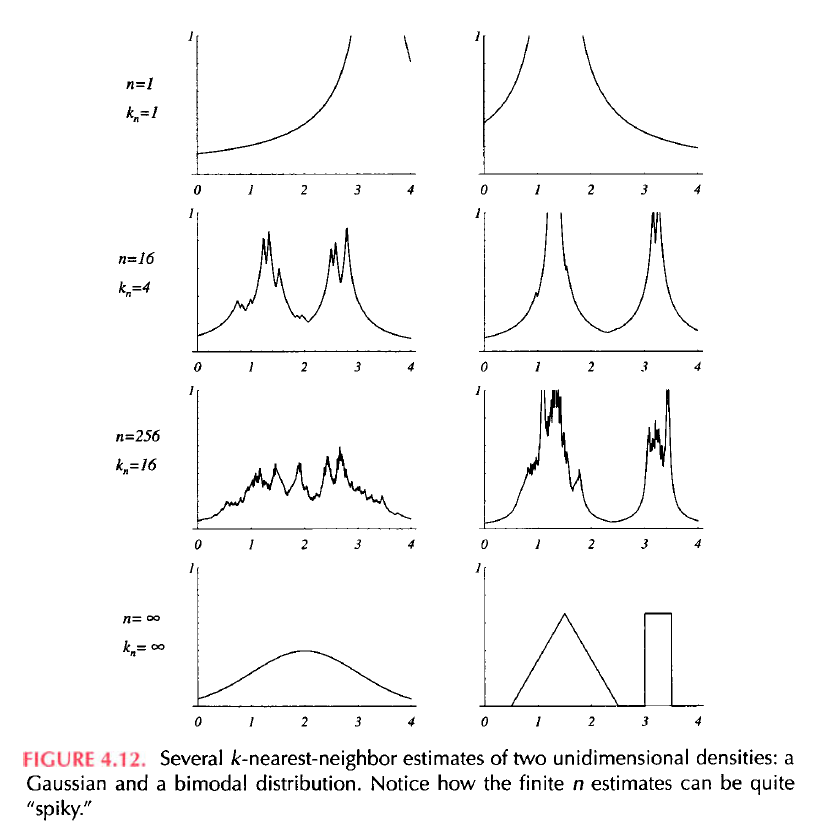

Text(0.5, 1.0, 'Mixed Distribution, X ~ ρU(3,3.5) + γT(0.75,1.25)')

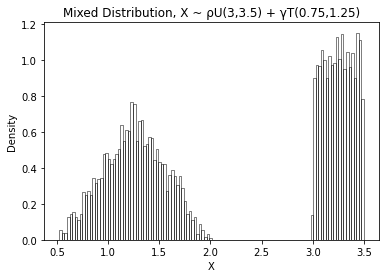

In [ ]:
def generate_mixed_2(rho, gamma, p_1, p_2): # p_1 first data point
  p = []
  N = len(p_1) + len(p_2)
  for i in range(0, int(N/2)):
    p.append(rho*p_1[i])    
    p.append(gamma*p_2[i])
  return np.array(p) 


# call generation function mixed
rho = 1; gamma = 1
p_3 = generate_mixed_2(rho, gamma, p_1, p_2)

# plot mixed distribution
sns.histplot(p, stat = "density", bins = 120, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Mixed Distribution, X ~ ρU({a},{b}) + γT({w},{c})")

Text(0.5, 1.0, 'Unit Normal, X~N(2,1)')

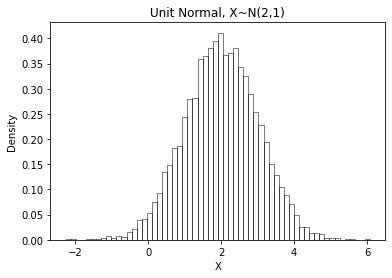

In [ ]:
# call normal distribution function
desired_mean = 2
desired_standard_deviation = 1 # square root of variance given = 4
number_of_points = 10000
Z = generate_normal(desired_mean, desired_standard_deviation, number_of_points)

# plot Gaussian
sns.histplot(Z, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Unit Normal, X~N({desired_mean},{desired_standard_deviation})")

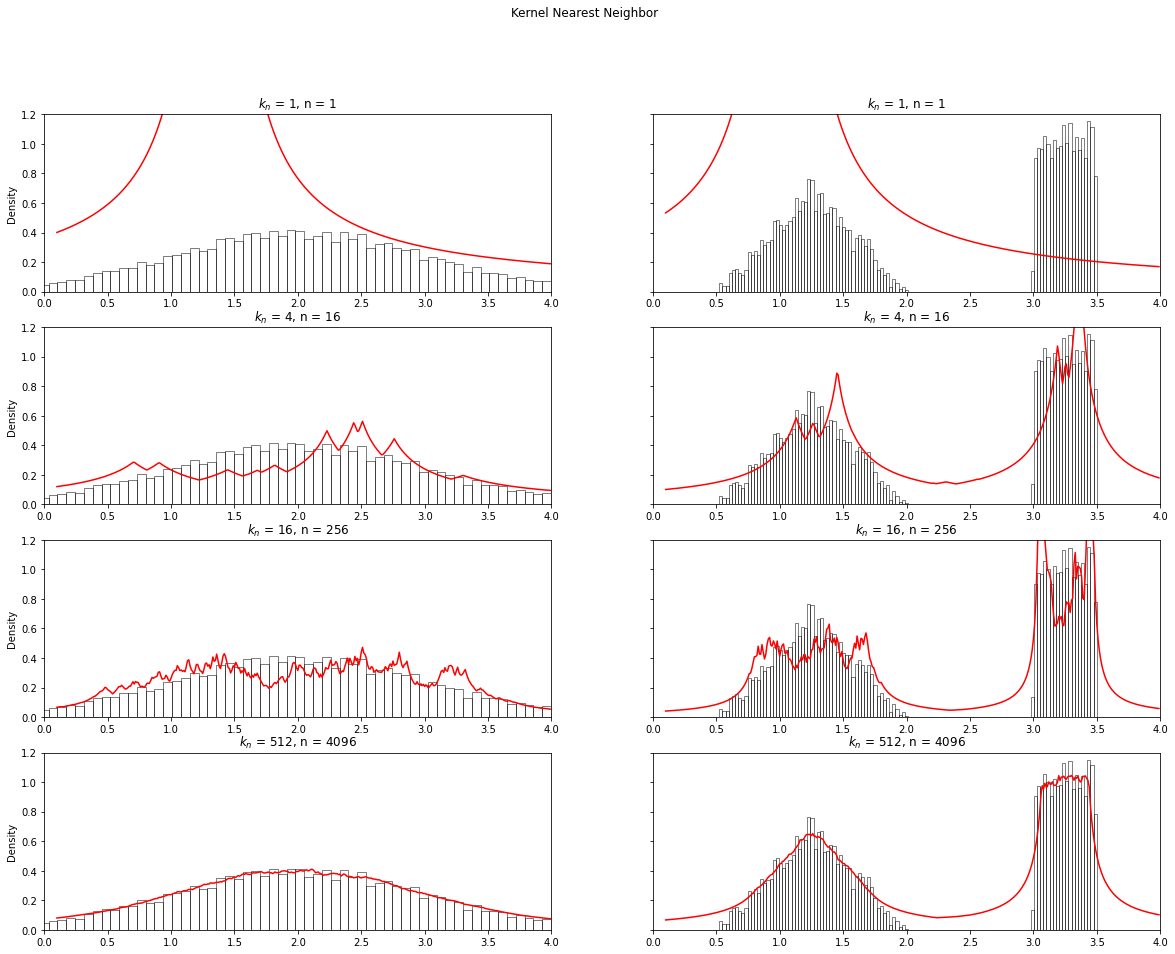

In [ ]:
# Kernel Nearest Neighbor in Fig. 4.12 gaussian and bimodal distributions
n = np.array([2**0, 2**4, 2**8, 2**12])
k = np.array([1, 4, 16, 512]) # number of neighbors

number_of_steps = 100
step_size = 1/number_of_steps
t = np.arange(0.1, 4, step_size)
n_bins = 120

def K_NN_estimate(array, number_of_neighbors, n):
  pdf = []

  initial_number_of_neighbors = number_of_neighbors # k_1
  for x in t:
    manhattan_distances = []
    for xi in range(0, n):
      # if (xi >= 1):
      #   number_of_neighbors = round(initial_number_of_neighbors*np.sqrt(xi)) # k_n = k_1*sqrt(n)
      distance = np.abs(x - array[xi])
      manhattan_distances.append(distance)
    manhattan_distances.sort() # sort by ascending manhattan distance values
    if xi == 0:
      boundary = manhattan_distances[number_of_neighbors - 1]
    elif xi >=1:
      boundary = manhattan_distances[number_of_neighbors]
    sum = (number_of_neighbors/n)/(2*boundary)
    pdf.append(sum)
  return np.array(pdf)


# Histogram of Data
fig, axes = plt.subplots(4, 2, figsize=(20, 15), sharey=True)
fig.suptitle('Kernel Nearest Neighbor')

# -------------------------------------------------------------------
#                               n = 1
# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1 for gaussian distribution
k_selection = 0
n_selection = 0
kde_0 = K_NN_estimate(Z, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(Z, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[0][0])
axes[0][0].plot(t, kde_0, c='#FF0000')
axes[0][0].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[0][0].set(xlim=(0, 4), ylim=(0, 1))

# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1 for bimodal distribution
k_selection = 0
n_selection = 0
kde_0 = K_NN_estimate(p, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(p, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[0][1])
axes[0][1].plot(t, kde_0, c='#FF0000')
axes[0][1].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[0][1].set(xlim=(0, 4), ylim=(0, 1))

# # -------------------------------------------------------------------
# #                               n = 16
# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 1
n_selection = 1
kde_0 = K_NN_estimate(Z, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(Z, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[1][0])
axes[1][0].plot(t, kde_0, c='#FF0000')
axes[1][0].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[1][0].set(xlim=(0, 4), ylim=(0, 1))

# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 1
n_selection = 1
kde_0 = K_NN_estimate(p, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(p, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[1][1])
axes[1][1].plot(t, kde_0, c='#FF0000')
axes[1][1].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[1][1].set(xlim=(0, 4), ylim=(0, 1))

# -------------------------------------------------------------------
#                               n = 256
# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 2
n_selection = 2
kde_0 = K_NN_estimate(Z, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(Z, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[2][0])
axes[2][0].plot(t, kde_0, c='#FF0000')
axes[2][0].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[2][0].set(xlim=(0, 4), ylim=(0, 1))

# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 2
n_selection = 2
kde_0 = K_NN_estimate(p, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(p, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[2][1])
axes[2][1].plot(t, kde_0, c='#FF0000')
axes[2][1].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[2][1].set(xlim=(0, 4), ylim=(0, 1))

# # -------------------------------------------------------------------
# #                               n = 4096
# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 3
n_selection = 3
kde_0 = K_NN_estimate(Z, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(Z, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[3][0])
axes[3][0].plot(t, kde_0, c='#FF0000')
axes[3][0].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[3][0].set(xlim=(0, 4), ylim=(0, 1))

# -------------------------------------------------------------------
# Kernel Nearest Neighbor estimate k_n = 1
k_selection = 3
n_selection = 3
kde_0 = K_NN_estimate(p, k[k_selection], n[n_selection])

# plot of Kernel Nearest Neighbor estimate k_n = 1
sns.histplot(p, stat = "density", bins = n_bins, kde = False, fill = False, color = "black", ax = axes[3][1])
axes[3][1].plot(t, kde_0, c='#FF0000')
axes[3][1].set_title(f"$k_n$ = {k[k_selection]}, n = {n[n_selection]}")
axes[3][1].set(xlim=(0, 4), ylim=(0, 1.2))

plt.show()

### P2.5: Use the realizations above to obtain the estimate of the density using the linear combination of Gaussian (LCG) approach with variable number of kernels in the EM algorithm. 

Text(0.5, 1.0, 'Unit Normal, X~N(2,1)')

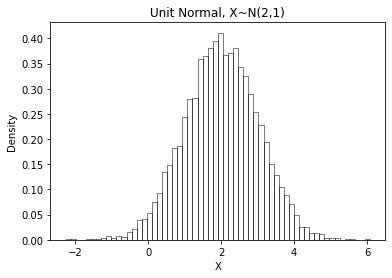

In [51]:
# call normal distribution function
desired_mean = 2
desired_standard_deviation = 1 # square root of variance given = 4
number_of_points = 10000
Z = generate_normal(desired_mean, desired_standard_deviation, number_of_points)

# plot Gaussian
sns.histplot(Z, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Unit Normal, X~N({desired_mean},{desired_standard_deviation})")

Text(0.5, 1.0, 'Uniform Distribution, X~U(3,3.5)')

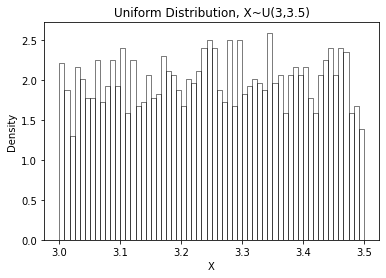

In [36]:
# call generation function unifrom
a = 3; b = 3.5; N = 2500 # start, stop, number of samples
p_1 = generate_uniform(a, b, N)

# plot uniform
sns.histplot(p_1, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Uniform Distribution, X~U({a},{b})")

Text(0.5, 1.0, 'Triangular Distribution, X~T(0.75,1.25)')

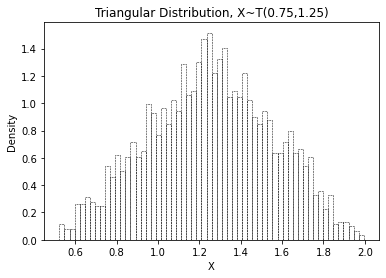

In [37]:
# call generation function triangular
w = 0.75; c = 1.25; n = 2500
p_2 = generate_triangular(w, c, n)

# plot triangular
sns.histplot(p_2, stat = "density", bins = 60, kde = False, fill = False, color = "black", linestyle = "--")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Triangular Distribution, X~T({w},{c})")

In [56]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood) < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    # if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
    fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
    number_of_steps = 100
    step_size = 1/number_of_steps
    x = np.arange(0.1, 4, step_size)
    y = np.zeros([len(x)])
    yax = np.zeros([N])
    axes.scatter(X, yax, color = "red")    
    
    for k in range(0, K):
      for j in range(1, len(x)):
        y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
      axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
    sns.histplot(X, stat = "density", kde = False, fill = False, color = "black")
    axes.set_xlabel("x")
    axes.set_ylabel("p(x)")
    axes.set_title(f"Iteration = {iteration}")
    axes.legend()
    fig.show()
    
    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total

Text(0, 0.5, 'Log-Likelihood')

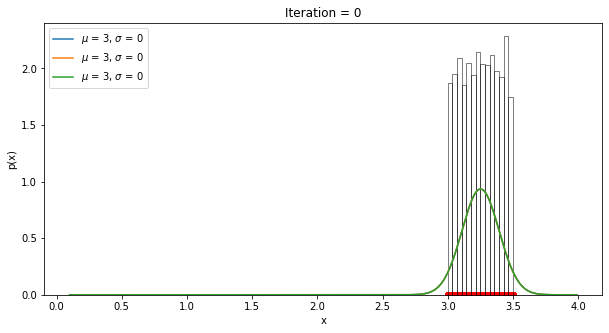

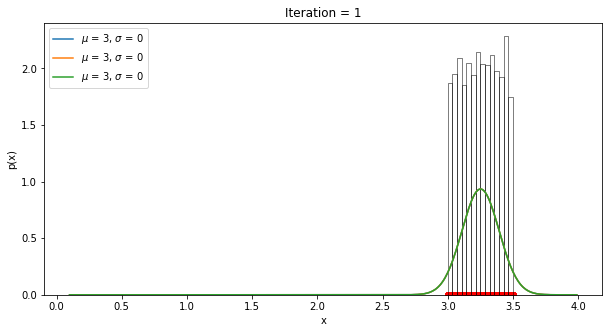

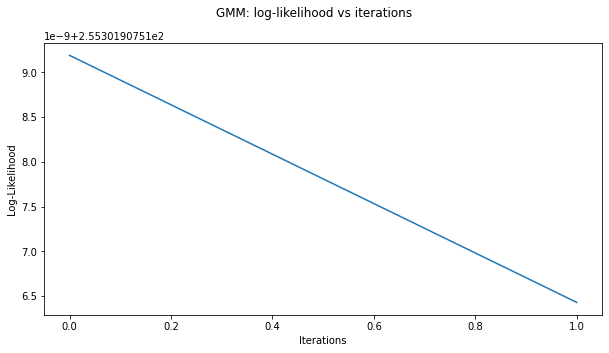

In [44]:
K = 3
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(p_1, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

Text(0, 0.5, 'Log-Likelihood')

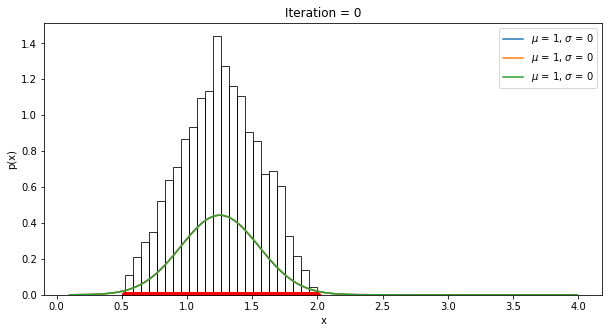

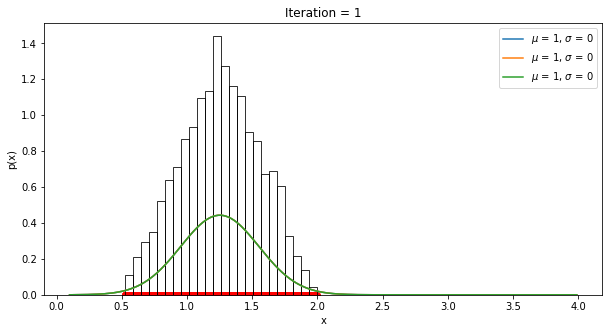

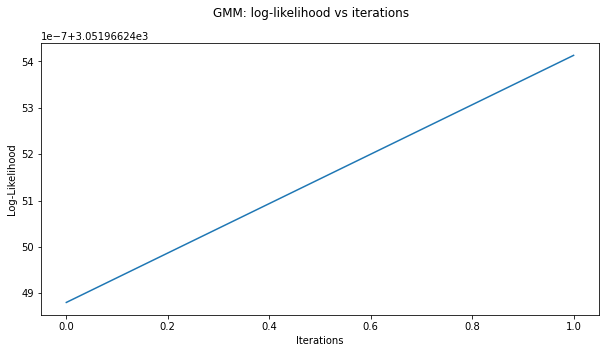

In [46]:
K = 3
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(p_2, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

Text(0, 0.5, 'Log-Likelihood')

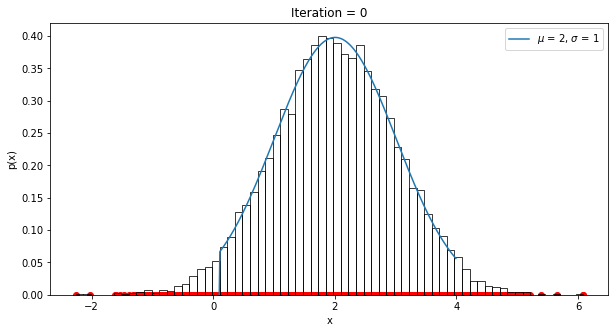

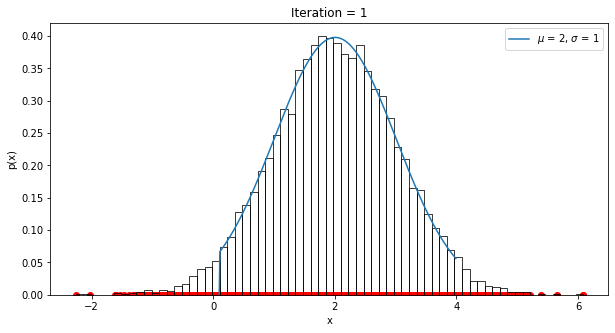

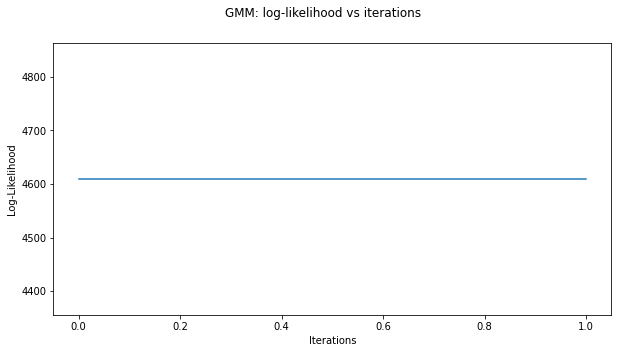

In [52]:
K = 1
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(Z, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

Text(0.5, 1.0, 'Mixed Distribution, X ~ ρU(3,3.5) + γT(0.75,1.25)')

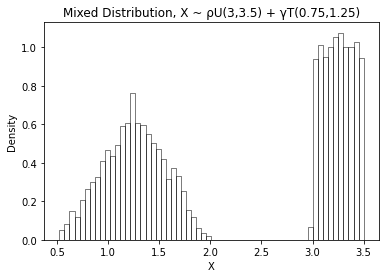

In [57]:
# mixed distributions generated realizations

def generate_mixed(rho, gamma, p_1, p_2):
  p = []
  N = len(p_1) + len(p_2)
  for i in range(0, int(N/2)):
    p.append(gamma*p_2[i])
  for i in range(0, int(N/2)):
    p.append(rho*p_1[i])    
  return np.array(p) 

# call generation function
rho = 1; gamma = 1
p = generate_mixed(rho, gamma, p_1, p_2)


# plot mixed distribution
sns.histplot(p, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Mixed Distribution, X ~ ρU({a},{b}) + γT({w},{c})")

In [69]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood)/log_likelihood < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    # if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
    fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
    number_of_steps = 100
    step_size = 1/number_of_steps
    x = np.arange(0.1, 4, step_size)
    y = np.zeros([len(x)])
    yax = np.zeros([N])
    axes.scatter(X, yax, color = "red")    
    
    for k in range(0, K):
      for j in range(1, len(x)):
        y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
      axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
    sns.histplot(X, bins = 120, stat = "density", kde = False, fill = False, color = "black")
    axes.set_xlabel("x")
    axes.set_ylabel("p(x)")
    axes.set_title(f"Iteration = {iteration}")
    axes.legend()
    fig.show()
    
    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total

Text(0, 0.5, 'Log-Likelihood')

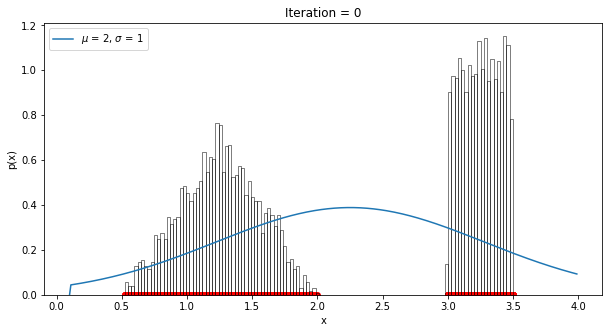

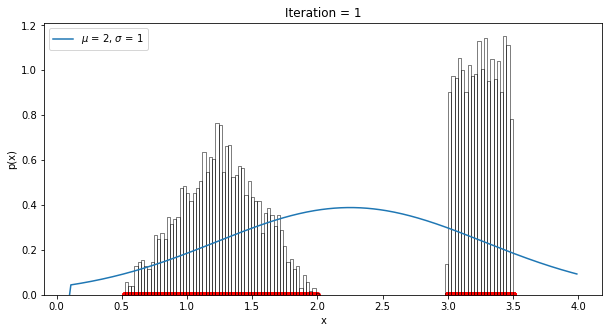

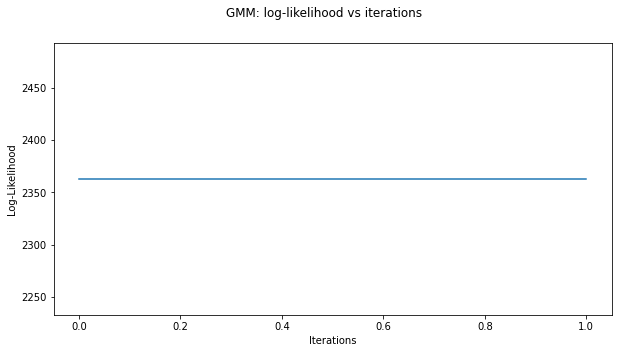

In [72]:
K = 1
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(p, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")

### P2.6: Use the realizations in Problems 1-5 to design (i.e., devise the decision boundary) and test (i.e., devise the probability of error) a two-class Bayesian classifier. That is, class 1 is assumed to come from a unit Gaussian and class 2 comes from densities shown in Problems 1(b), 1(c) and 1(d), respectively. 
Hint: Generate large number of samples, then use a portion to design and the rest to test the classifier. Compare with the theoretical case.


Text(0.5, 1.0, 'Uniform Distribution, X~U(5,9)')

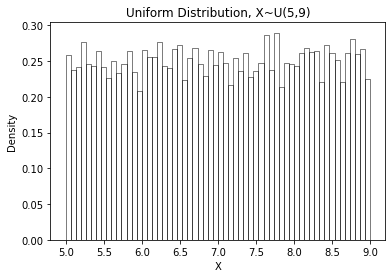

In [10]:
# call generation function unifrom
a = 5; b = 9; N = 10000 # start, stop, number of samples
p_1 = generate_uniform(a, b, N)

# plot uniform
sns.histplot(p_1, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Uniform Distribution, X~U({a},{b})")

Text(0.5, 1.0, 'Unit Normal, X~N(12,1)')

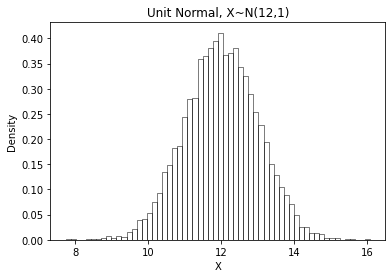

In [25]:
# call normal distribution function
desired_mean = 12
desired_standard_deviation = 1 # square root of variance given = 4
number_of_points = 10000
Z = generate_normal(desired_mean, desired_standard_deviation, number_of_points)

# plot Gaussian
sns.histplot(Z, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Unit Normal, X~N({desired_mean},{desired_standard_deviation})")

Text(0.5, 1.0, 'Mixed Distribution, X ~ ρU(5,9) + γN(12,1)')

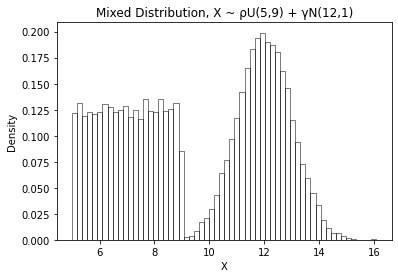

In [26]:
# mixed distributions generated realizations

def generate_mixed_with_unit_normal(rho, gamma, p_1, p_2):
  p_4 = []
  N = len(p_1) + len(p_2)
  for i in range(0, int(N/2)):
    p.append(gamma*p_2[i])
    p.append(rho*p_1[i])    
  return np.array(p) 

# call generation function
rho = 1; gamma = 1
p_4 = generate_mixed(rho, gamma, Z, p_1)


# plot mixed distribution
sns.histplot(p_4, stat = "density", bins = 60, kde = False, fill = False, color = "black")
plt.xlabel('X')
plt.ylabel('Density')
plt.title(f"Mixed Distribution, X ~ ρU({a},{b}) + γN({desired_mean},{desired_standard_deviation})")

In [23]:
# EM Algorithm Implementation from
import sys
import matplotlib.pyplot as plt

def EM_GMM(X, K, convergence_discriminant_toll):
  N = np.size(X)

  # Initialization
  alpha = np.ones([K])/K
  mu = np.linspace(min(X), max(X), K)
  sigma = np.ones([K])*30 # dispersion
  convergence = 0 # loop termination condition when the log-likelihood doesn't change
  previous_likelihood = -sys.maxsize
  iteration = 0
  
  likelihood_total = []
  iterations = []
  while (convergence != 1):
    # Estimation/Expection Step (E-Step):
    R = np.zeros([K, N]) # initialize the responsibility K by N vector 
    for i in range(0, N):
      R_summation = 0
      for j in range(0, K):
        R[j,i] = (alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*np.exp((-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2))
        R_summation += R[j,i]
      R[:,i] = R[:,i]/R_summation

    # Maximization Step (M-Step):
    for j in range(0, K):
      mu_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of mean
        mu_number += R[j,i]*X[i]
        R_summation += R[j,i]
      mu[j] = mu_number/R_summation
      alpha[j] = R_summation/N

    for j in range(0, K):
      sigma_number = 0
      R_summation = 0
      for i in range(0, N):
        # maximization of variance
        sigma_number += R[j,i]*(X[i] - mu[j])**2
        R_summation += R[j,i]
      sigma[j] = np.sqrt(sigma_number/R_summation)
    
    # likelihood 
    log_likelihood = 0
    for i in range(1, N):
      for j in range(0, K):
        log_likelihood += np.log(alpha[j]/np.sqrt(2*np.pi*(sigma[j])**2))*(-1/2)*((X[i] - mu[j])**2)/(sigma[j]**2)
    
    # convergence
    if np.abs(log_likelihood - previous_likelihood)/log_likelihood < convergence_discriminant_toll:
      convergence = 1

    previous_likelihood = log_likelihood

    likelihood_total.append(log_likelihood.item())
    iterations.append(iteration)

    # if (iteration == 0) or (np.mod(iteration, 10) == 0):
    # plotting Distributions
    fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
    number_of_steps = 100
    step_size = 1/number_of_steps
    x = np.arange(0.1, 4, step_size)
    y = np.zeros([len(x)])
    yax = np.zeros([N])
    axes.scatter(X, yax, color = "red")    
    
    for k in range(0, K):
      for j in range(1, len(x)):
        y[j] = alpha[k]*(1/np.sqrt(2*np.pi*(sigma[k])**2))*np.exp((-1/2)*((x[j] - mu[k])**2)/(sigma[k]**2))
      axes.plot(x, y, label = f"$μ$ = {round(mu[k].item())}, $σ$ = {round(sigma[k])}")
    sns.histplot(X, bins = 120, stat = "density", kde = False, fill = False, color = "black")
    axes.set_xlabel("x")
    axes.set_ylabel("p(x)")
    axes.set_title(f"Iteration = {iteration}")
    axes.legend()
    fig.show()
    
    # print(f"\niteration = {iteration}")
    # print(f"log-likelihood = {log_likelihood}")
    # print(f"previous likelihood = {previous_likelihood}")
    # print(f"mu = {mu}")
    # print(f"sigma = {sigma}")
    # print(f"alpha =  {alpha}")
    # print(f"likelihood total = {likelihood_total}")
    
    iteration += 1 # t = t + 1
  return mu, sigma, alpha, iteration, iterations, likelihood_total

Text(0, 0.5, 'Log-Likelihood')

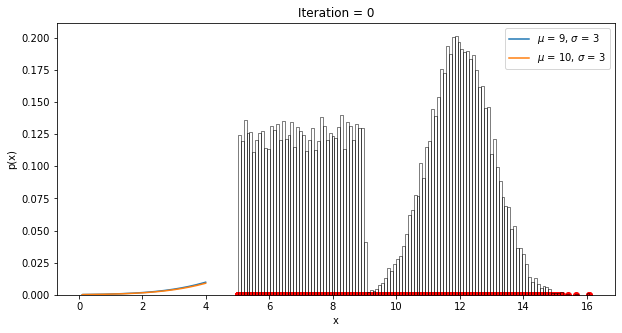

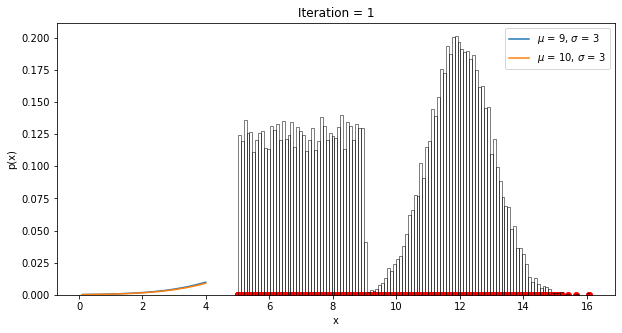

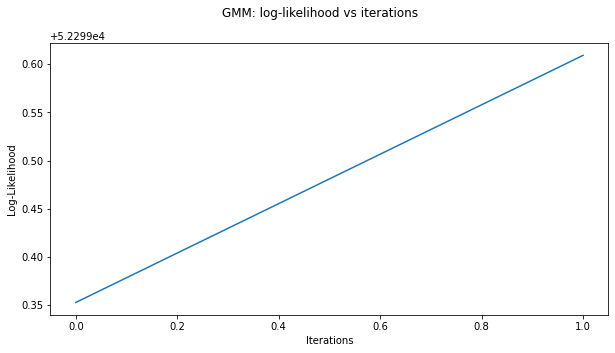

In [27]:
K = 2
convergence_discriminant_toll = 0.001 # adjusting this up or down will give more or less iterations
mu, sigma, alpha, iteration, iterations, likelihood_total = EM_GMM(p_4, K, convergence_discriminant_toll)

# plotting log-likelihood vs iterations
fig, axes = plt.subplots(1, figsize=(10, 5), sharey=True)
fig.suptitle('GMM: log-likelihood vs iterations')

axes.plot(iterations, likelihood_total)
axes.set_xlabel("Iterations")
axes.set_ylabel("Log-Likelihood")